Metody klasyfikacji na zbiorze danych: League of Legends SoloQ matches at 15 minutes 2024
 https://www.kaggle.com/datasets/karlorusovan/league-of-legends-soloq-matches-at-10-minutes-2024?resource=download


league of legends jest gra 5 vs 5 graczy. Wygrana nastepuje gdy jedna ze stron zniszczy baze wroga. Zbior danych zawiera statystyki meczow w 25min gry z wynikiem ktora z druzyn wygrala. Statystyki zawieraja miedzy innymi ilosc zajetych punktow neutralnych na mapie, zebrane zloto oraz punkty doswiadczenia. Zadanie predykcyjne bedzie mialo na celu zgadniecie ktora ze stron ma najwieksza szanse na wygranie oraz odkrycie ktore ze zmiennych maja najwiekszy wplyw na wynik starcia. 

In [1]:
import pandas as pd
data = pd.read_csv("match_data_v5_with_column.csv")
print(data.head())
print(data.info())

data.drop("matchId",inplace=True, axis=1)

            matchId  blueTeamControlWardsPlaced  blueTeamWardsPlaced  \
0  EUW1_6882489515'                           2                   23   
1  EUW1_6882416210'                           2                   46   
2  EUW1_6881092720'                           2                   19   
3  EUW1_6879405717'                           3                   28   
4  EUW1_6879389461'                           3                   30   

   blueTeamTotalKills  blueTeamDragonKills  blueTeamHeraldKills  \
0                   4                    2                    0   
1                  12                    1                    0   
2                  13                    0                    0   
3                   8                    0                    1   
4                  11                    1                    1   

   blueTeamTowersDestroyed  blueTeamInhibitorsDestroyed  \
0                        0                            0   
1                        1                    

In [2]:
data

,blueTeamControlWardsPlaced,blueTeamWardsPlaced,blueTeamTotalKills,blueTeamDragonKills,blueTeamHeraldKills,blueTeamTowersDestroyed,blueTeamInhibitorsDestroyed,blueTeamTurretPlatesDestroyed,blueTeamFirstBlood,blueTeamMinionsKilled,...,redTeamHeraldKills,redTeamTowersDestroyed,redTeamInhibitorsDestroyed,redTeamTurretPlatesDestroyed,redTeamMinionsKilled,redTeamJungleMinions,redTeamTotalGold,redTeamXp,redTeamTotalDamageToChamps,blueWin
0,2,23,4,2,0,0,0,7,0,388,...,0,2,0,1,400,94,29637,32613,27239,1
1,2,46,12,1,0,1,0,10,0,348,...,0,1,0,4,373,76,28970,30320,36585,0
2,2,19,13,0,0,0,0,11,0,331,...,0,2,0,3,340,84,30510,29464,42984,0
3,3,28,8,0,1,1,0,9,1,355,...,0,0,0,5,378,87,25157,31069,28229,0
4,3,30,11,1,1,1,0,7,0,370,...,0,1,0,5,382,96,26052,29475,19245,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24220,0,27,1,1,0,0,0,5,0,282,...,0,0,0,0,370,102,26134,30760,22845,0
24221,4,29,5,0,0,0,0,4,0,323,...,0,1,0,2,365,80,25169,30857,29694,0
24222,1,25,16,1,1,1,0,11,0,300,...,0,1,0,4,342,81,30528,29566,36545,0
24223,4,27,15,0,0,1,0,9,0,364,...,0,2,0,2,341,74,31761,30573,42858,0


Wiele z kolumn jest w wersji dla czerwonej/niebieskiej druzyny z jej prefiksem, wiec dla wygodniejszej analizy zapisuje ktore sa tego typu, zeby moc odwolywac sie parami przez samo dodanie sufixu blueTeam- redTeam-.

In [3]:
feature_names = [ str(x).removeprefix("blueTeam") for x in  data.columns[0:13].tolist()] 
print(feature_names)
feature_names.remove("FirstBlood")

symmetric_features  = ["blueTeamFirstBlood", "blueWin"]
print(feature_names)


['ControlWardsPlaced', 'WardsPlaced', 'TotalKills', 'DragonKills', 'HeraldKills', 'TowersDestroyed', 'InhibitorsDestroyed', 'TurretPlatesDestroyed', 'FirstBlood', 'MinionsKilled', 'JungleMinions', 'TotalGold', 'Xp']
['ControlWardsPlaced', 'WardsPlaced', 'TotalKills', 'DragonKills', 'HeraldKills', 'TowersDestroyed', 'InhibitorsDestroyed', 'TurretPlatesDestroyed', 'MinionsKilled', 'JungleMinions', 'TotalGold', 'Xp']


<h2>Wartosci odstajace i przeglad rozkladow calych danych</h2>

Rozklady dla obu druzyn. Jak okaze sie ponizej wykresy maja daleko rozciagnieta os X, co oznacza, ze jest tam mala ilosc skrajnych wartosci, ktore zaburzaja nam analize.

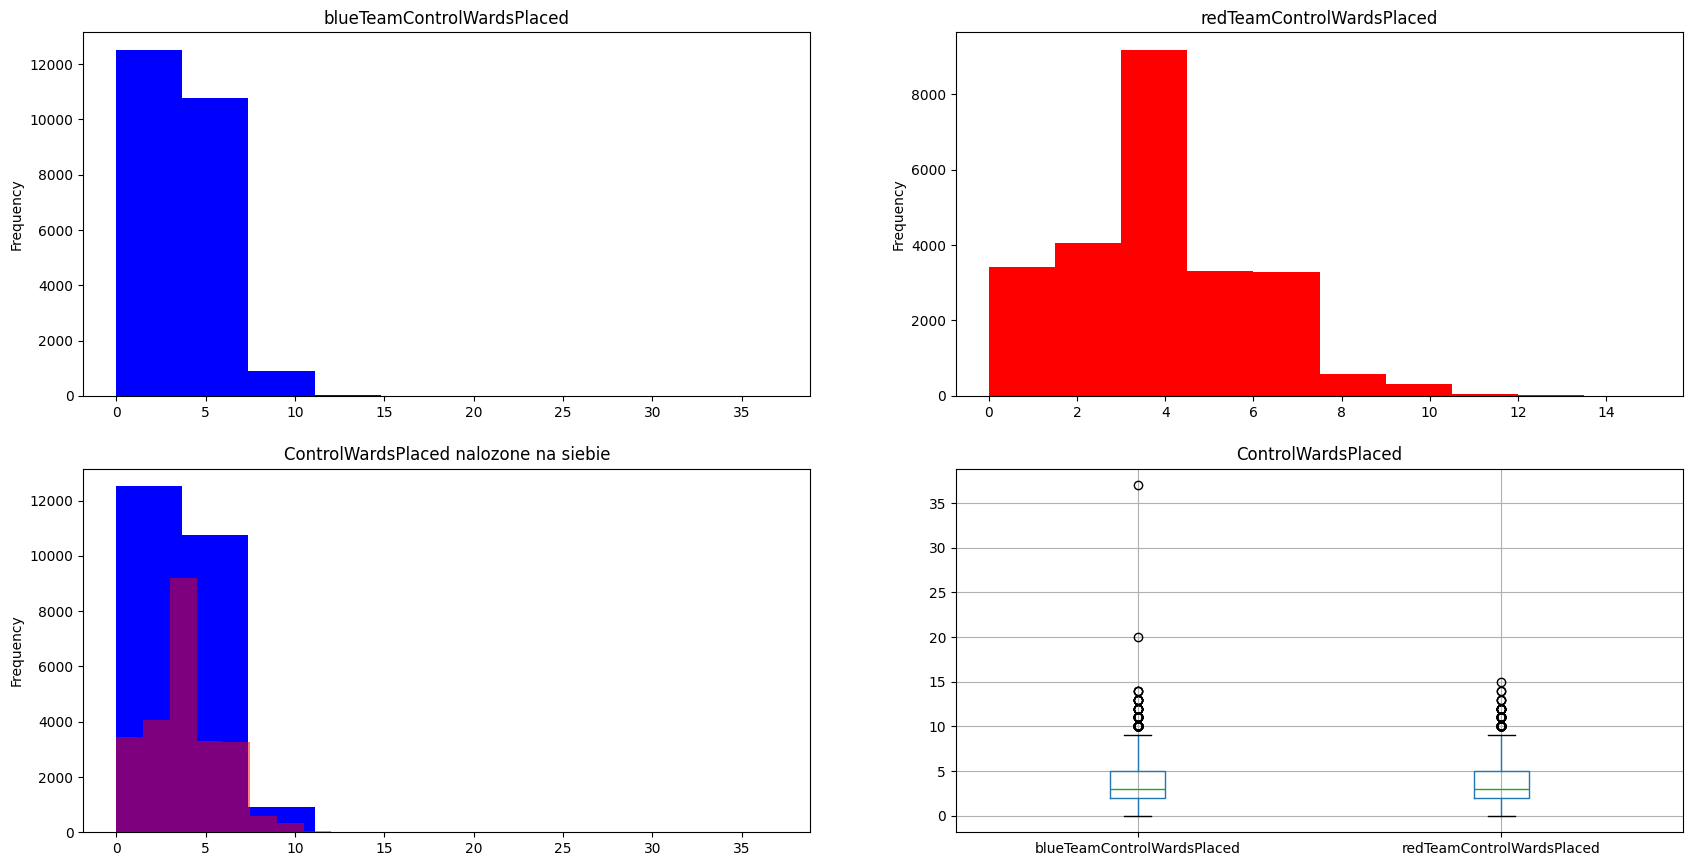

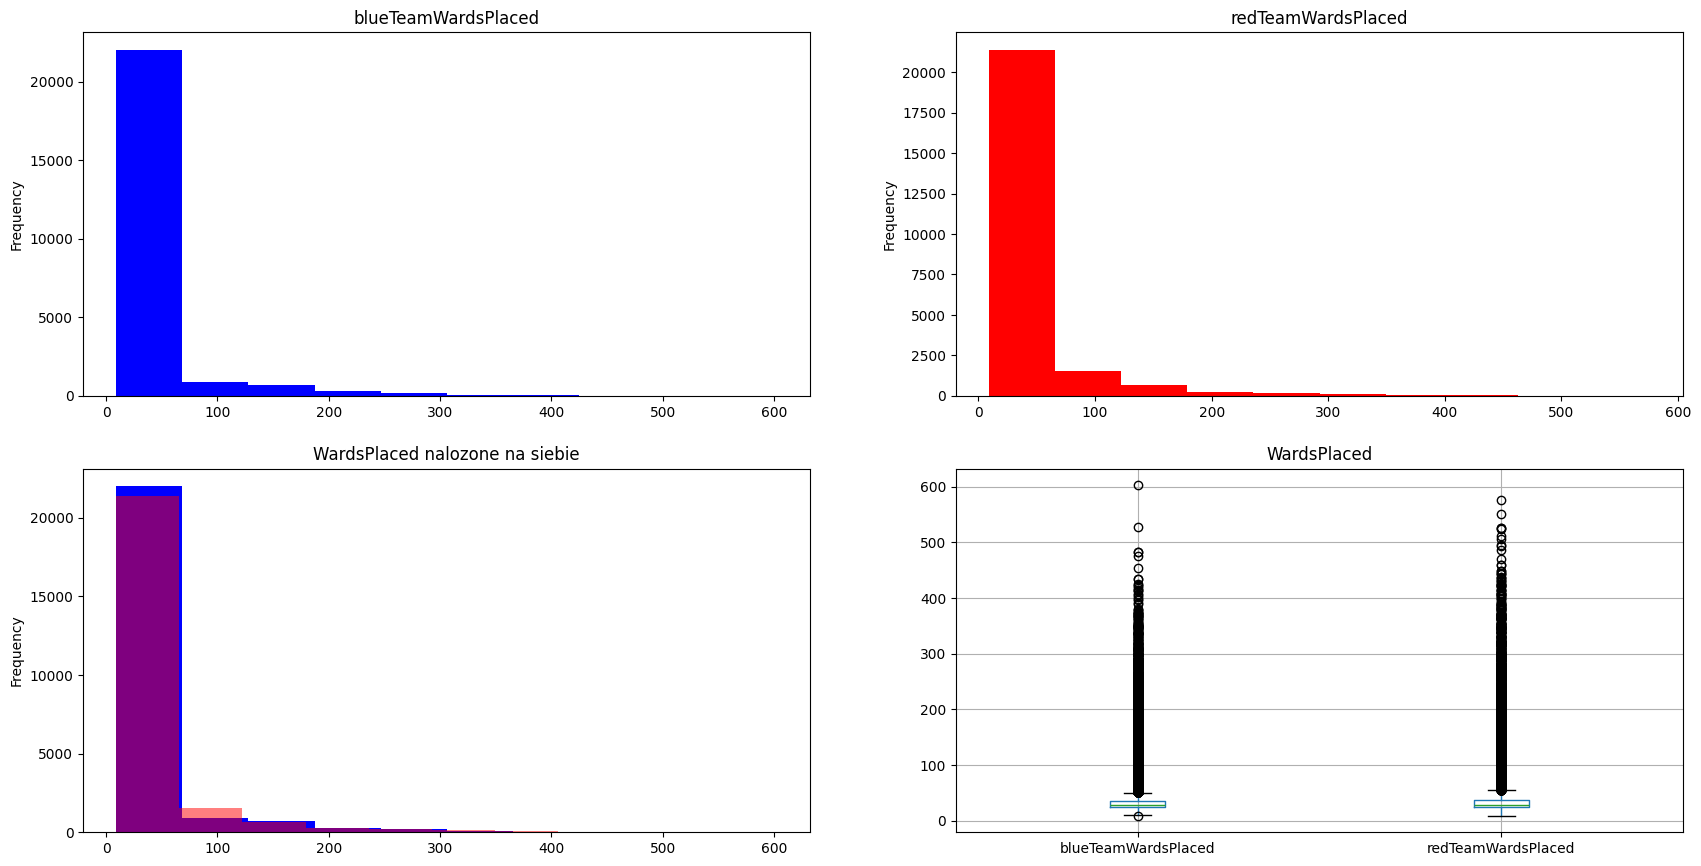

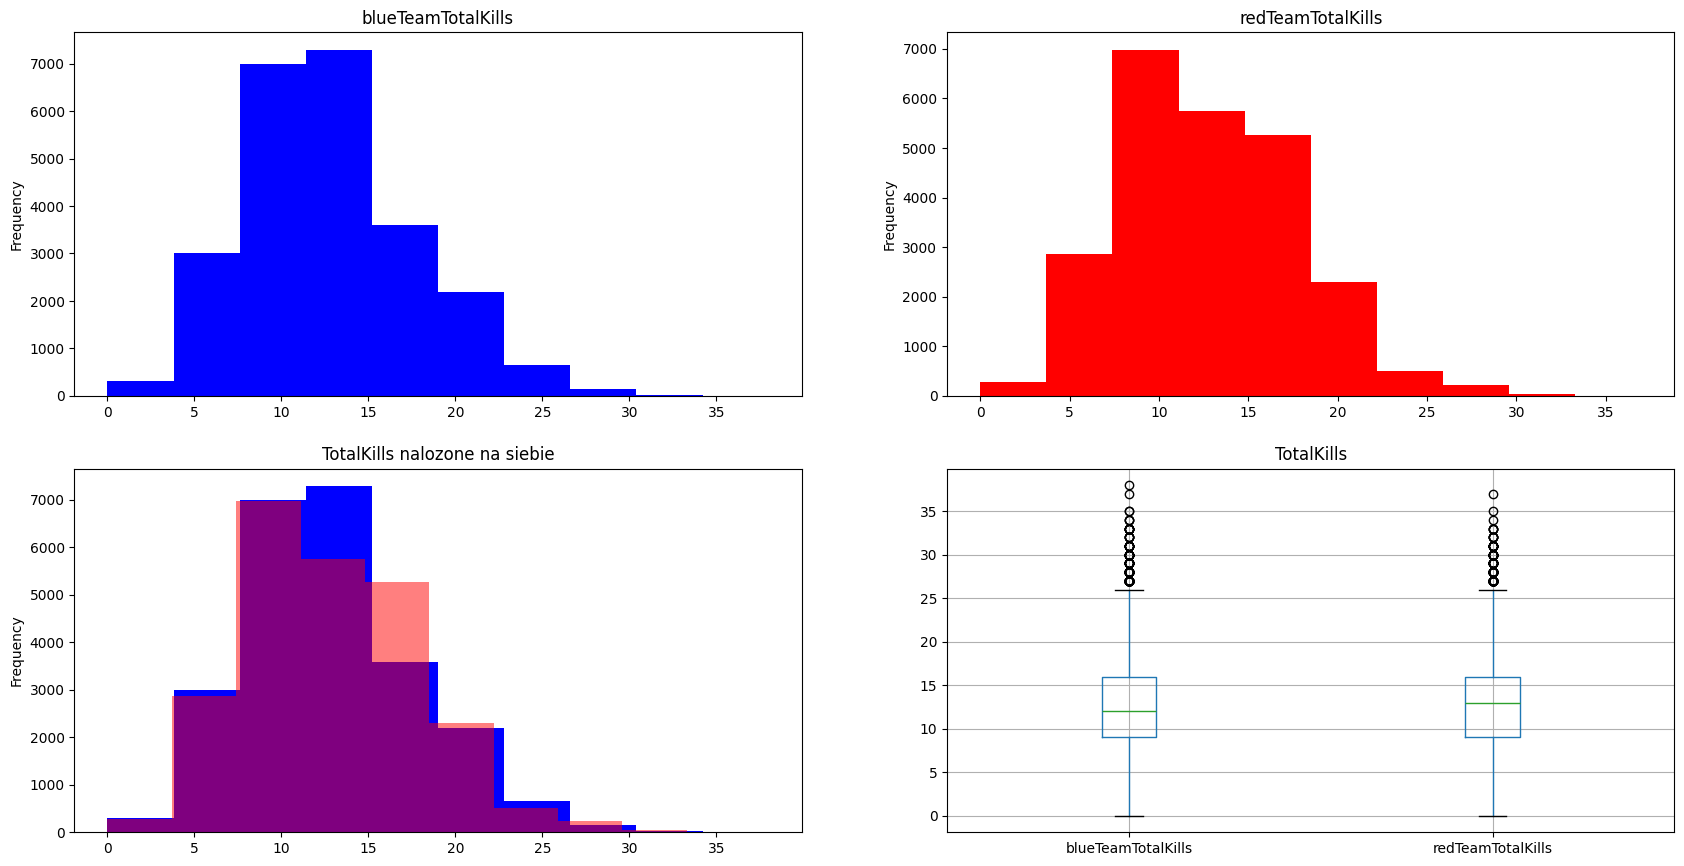

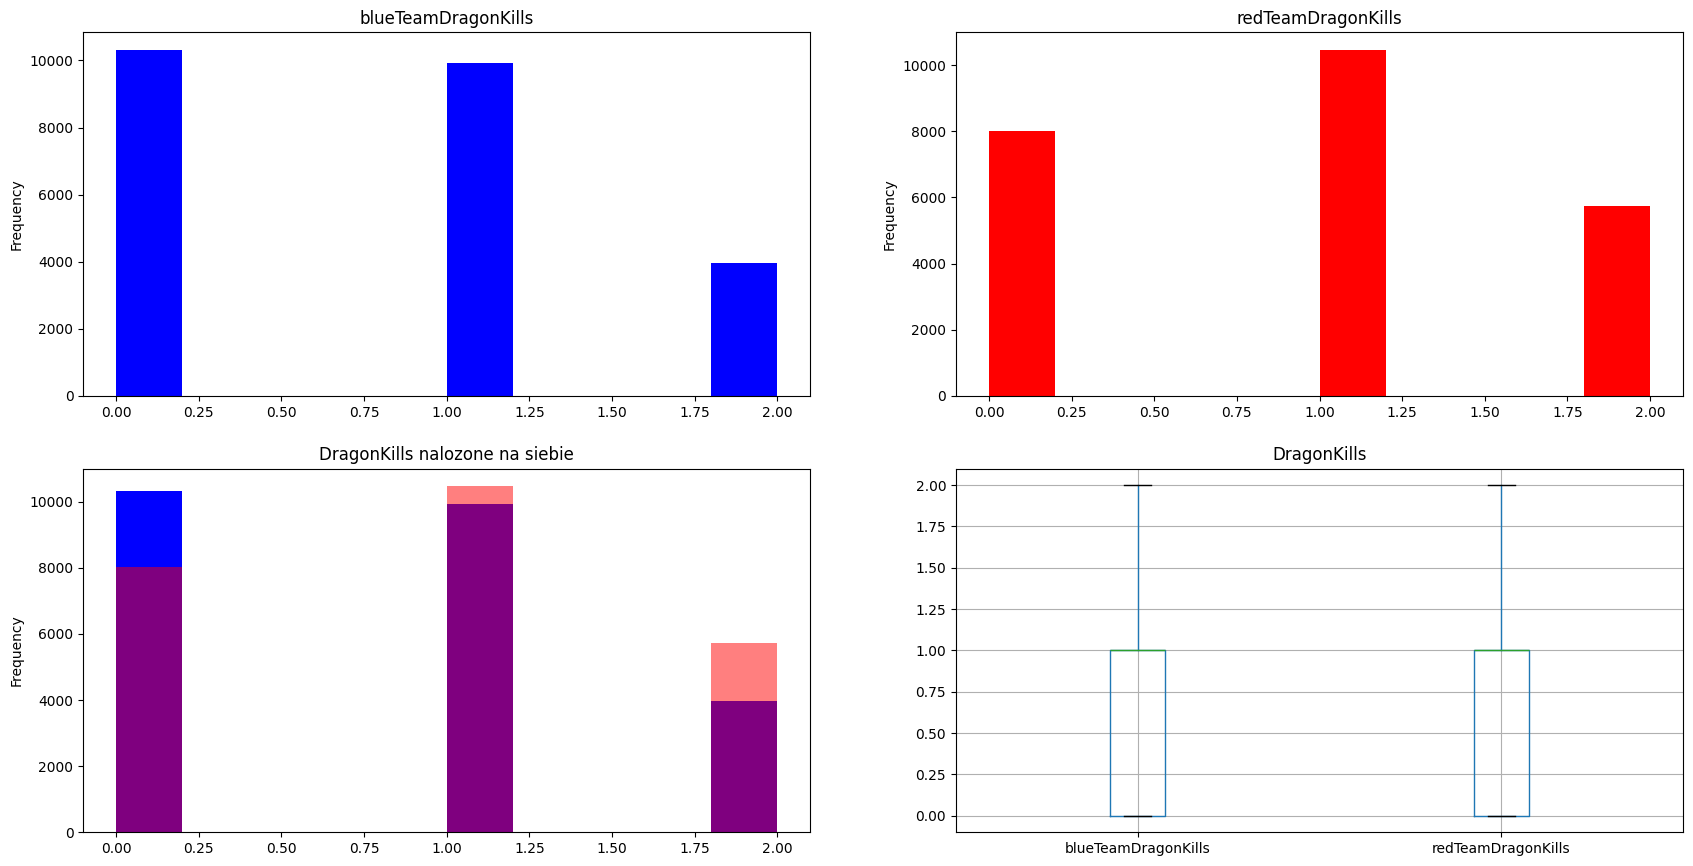

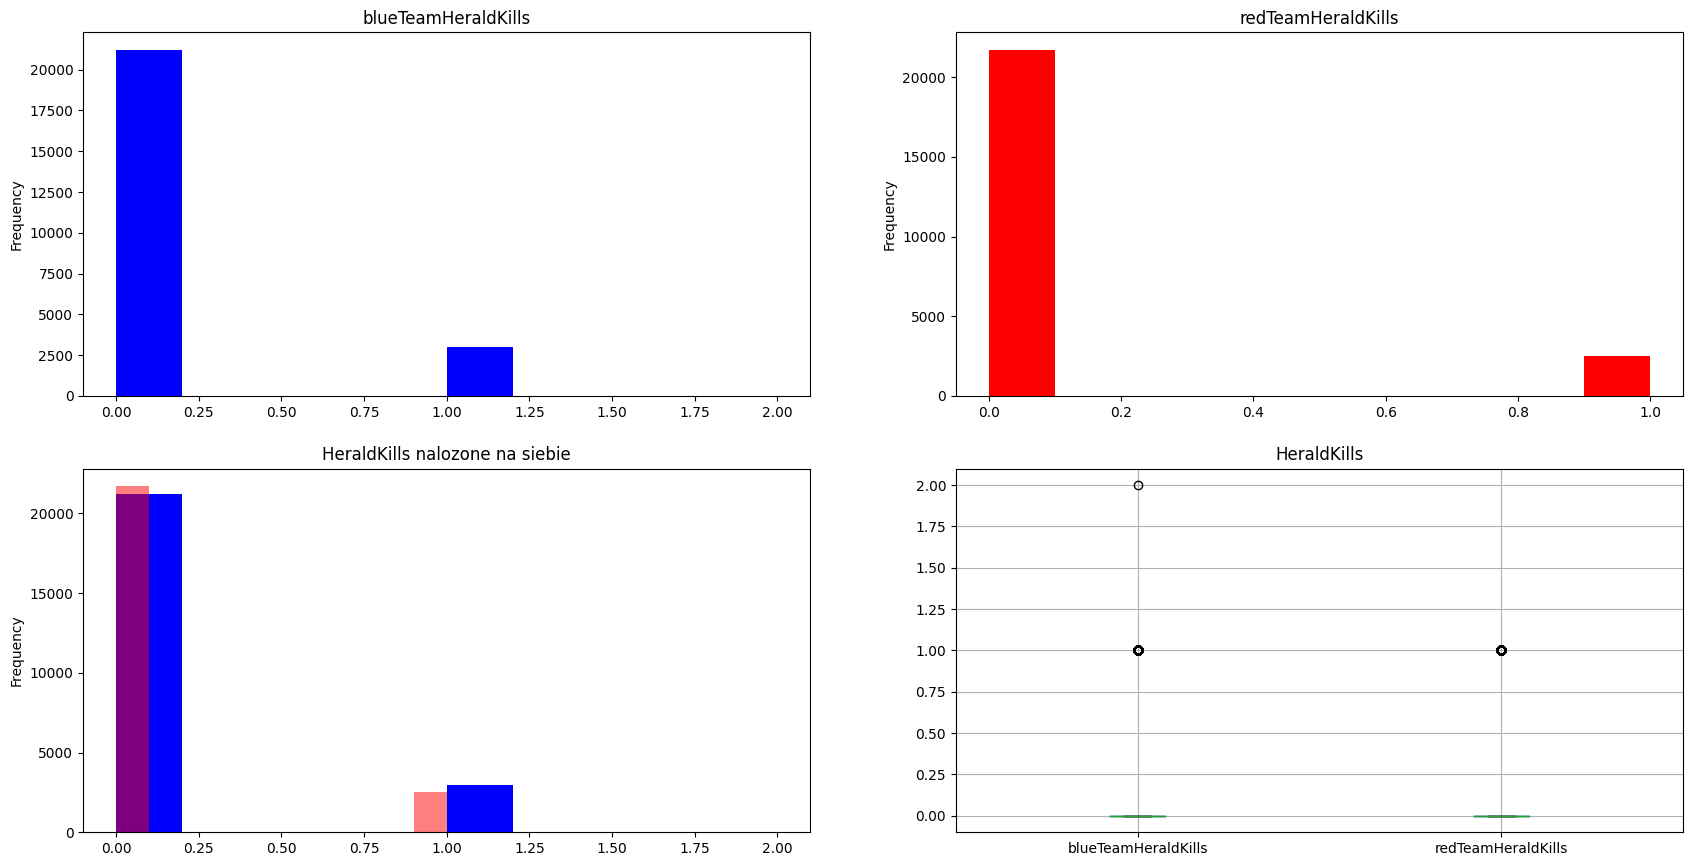

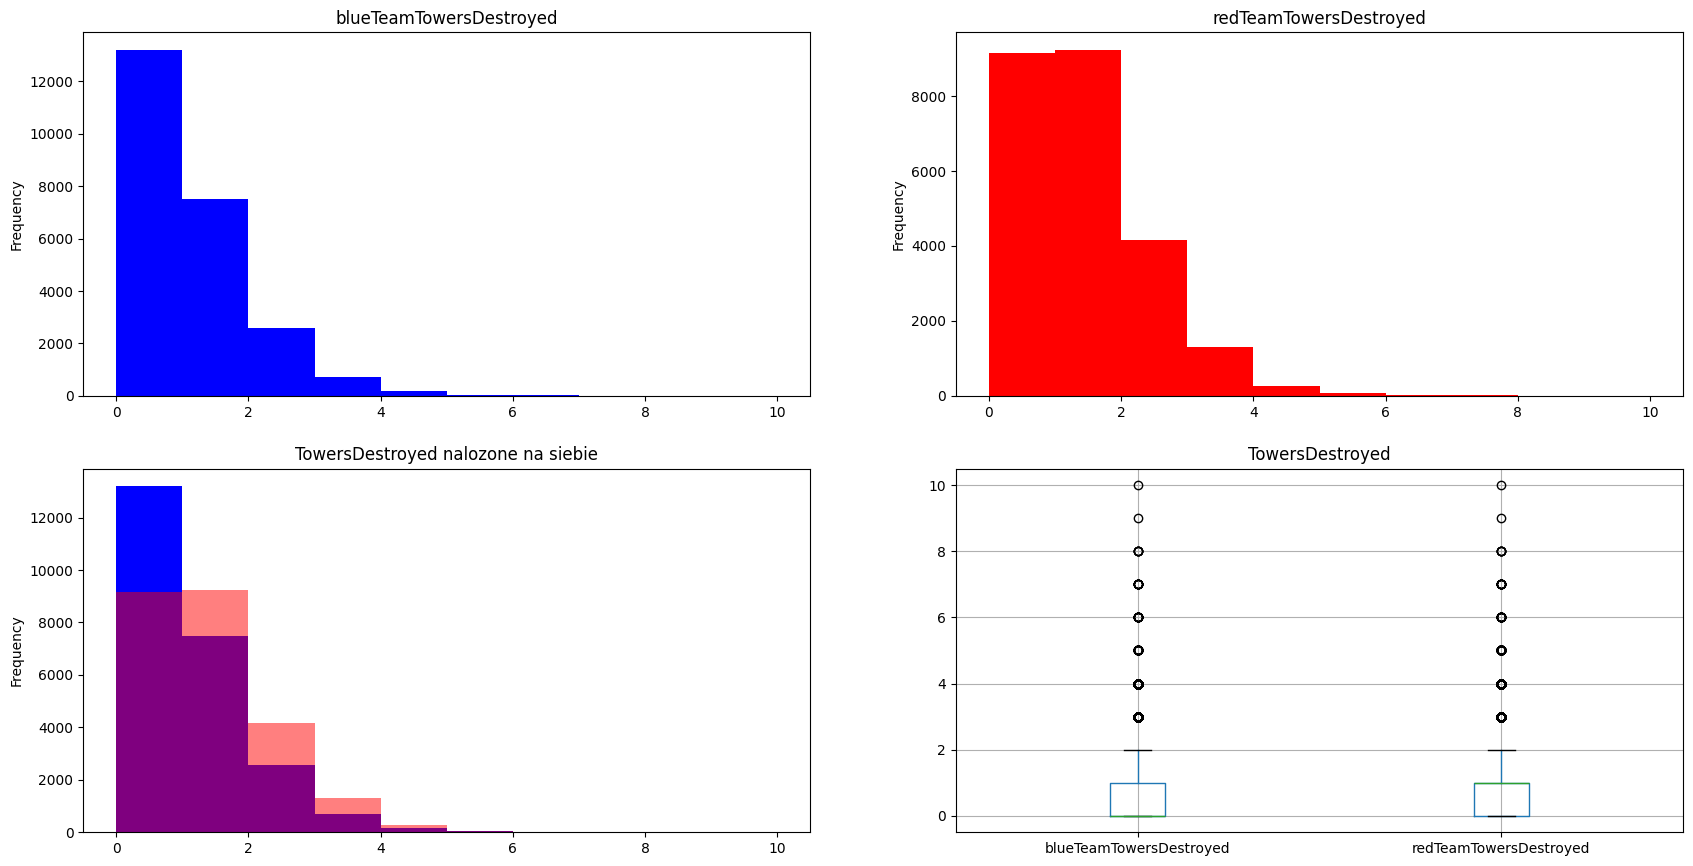

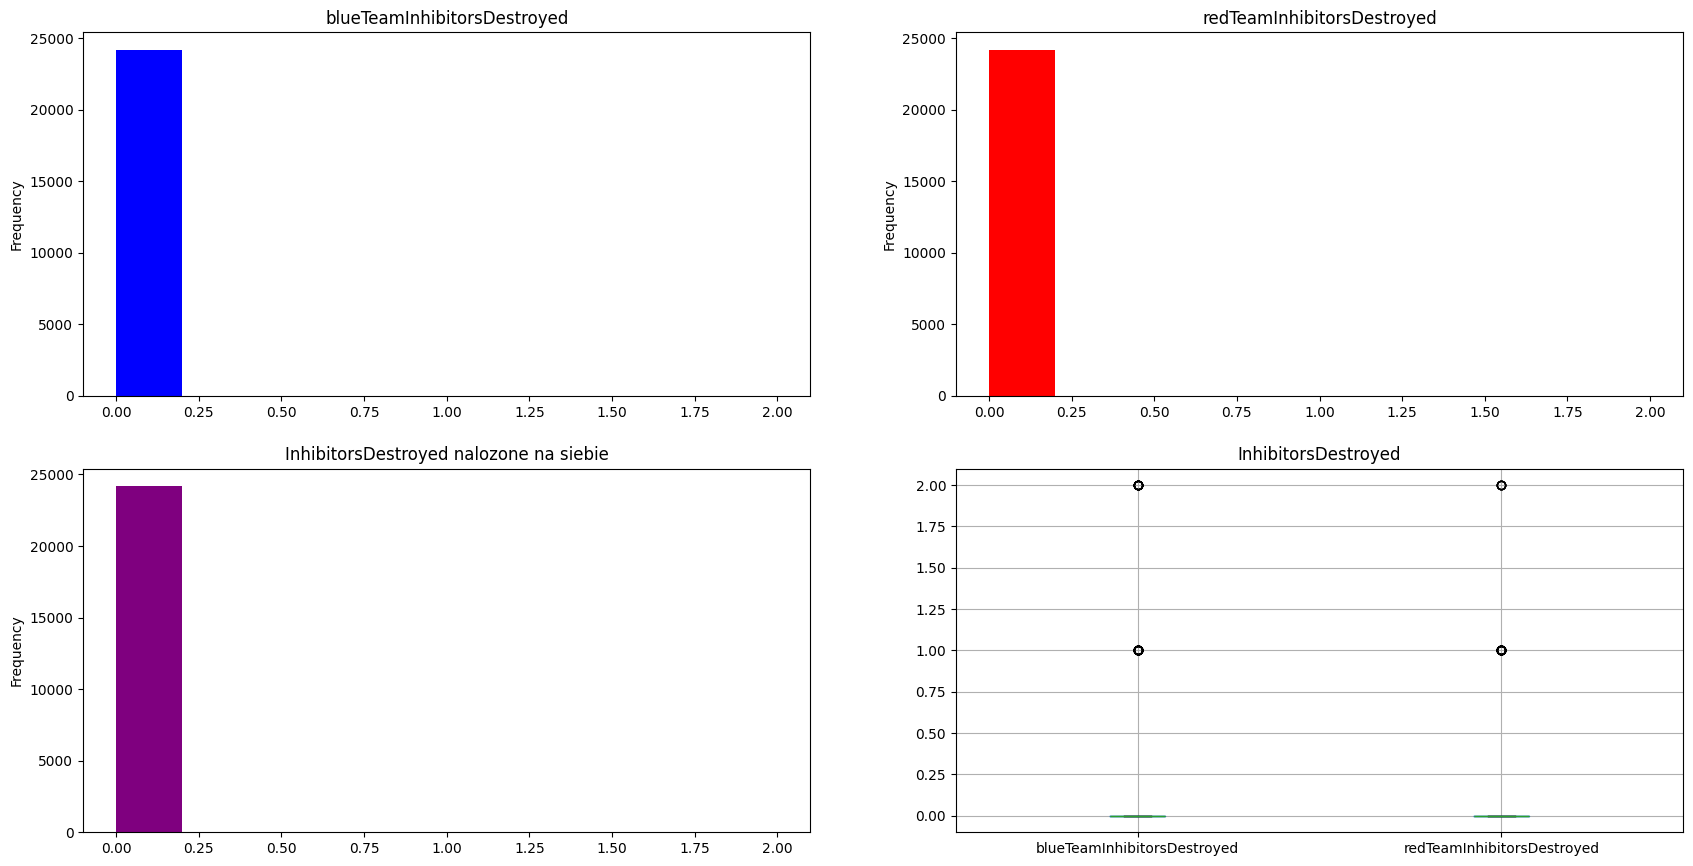

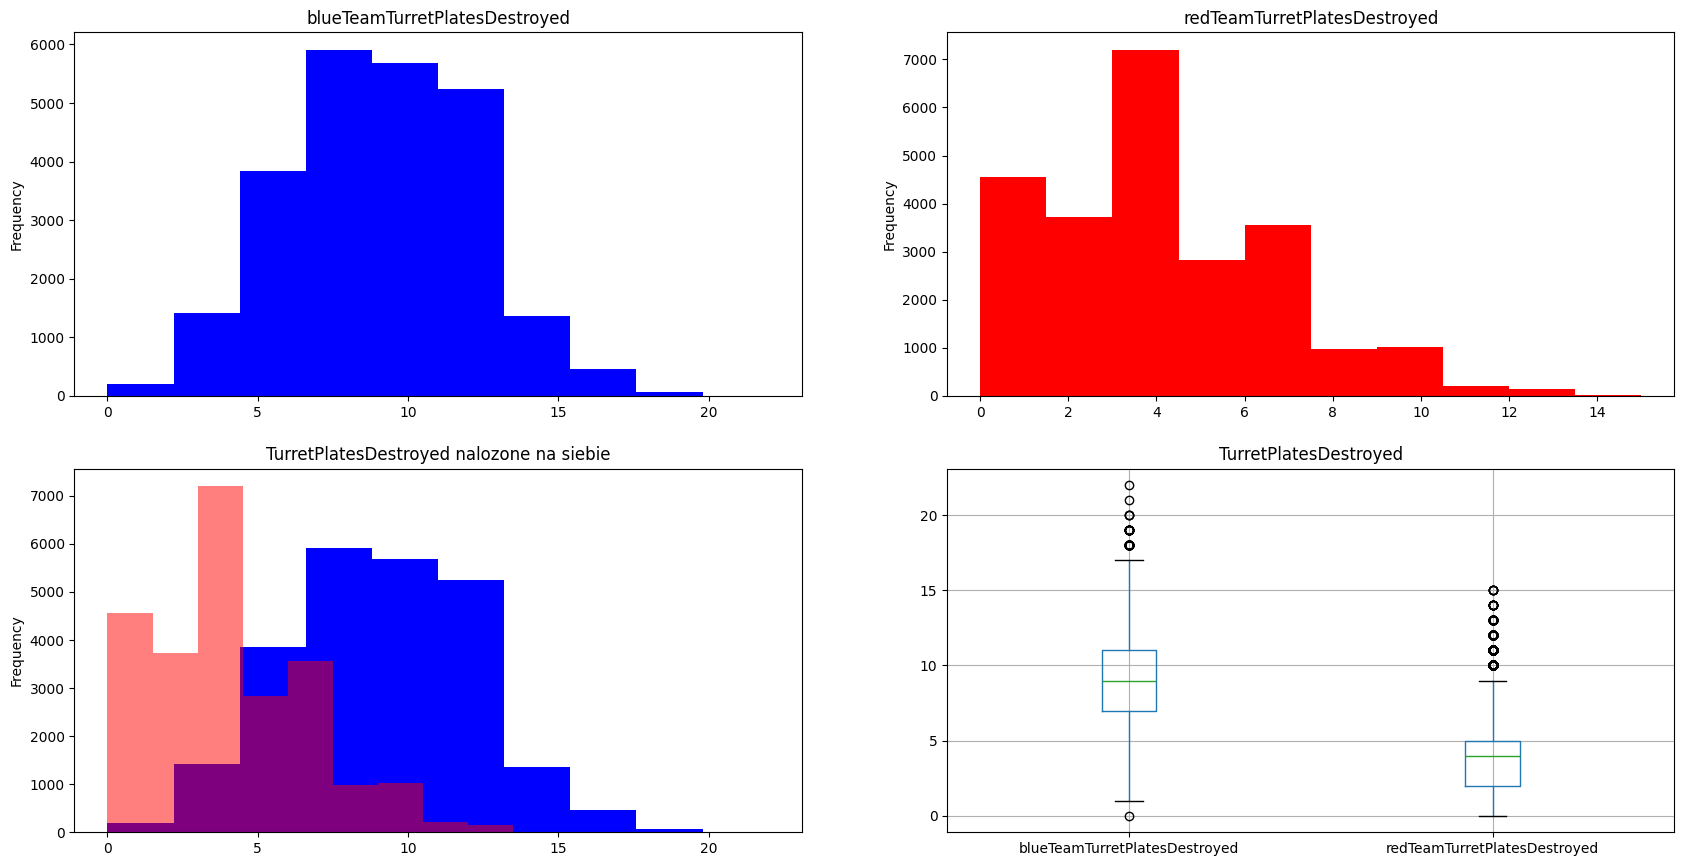

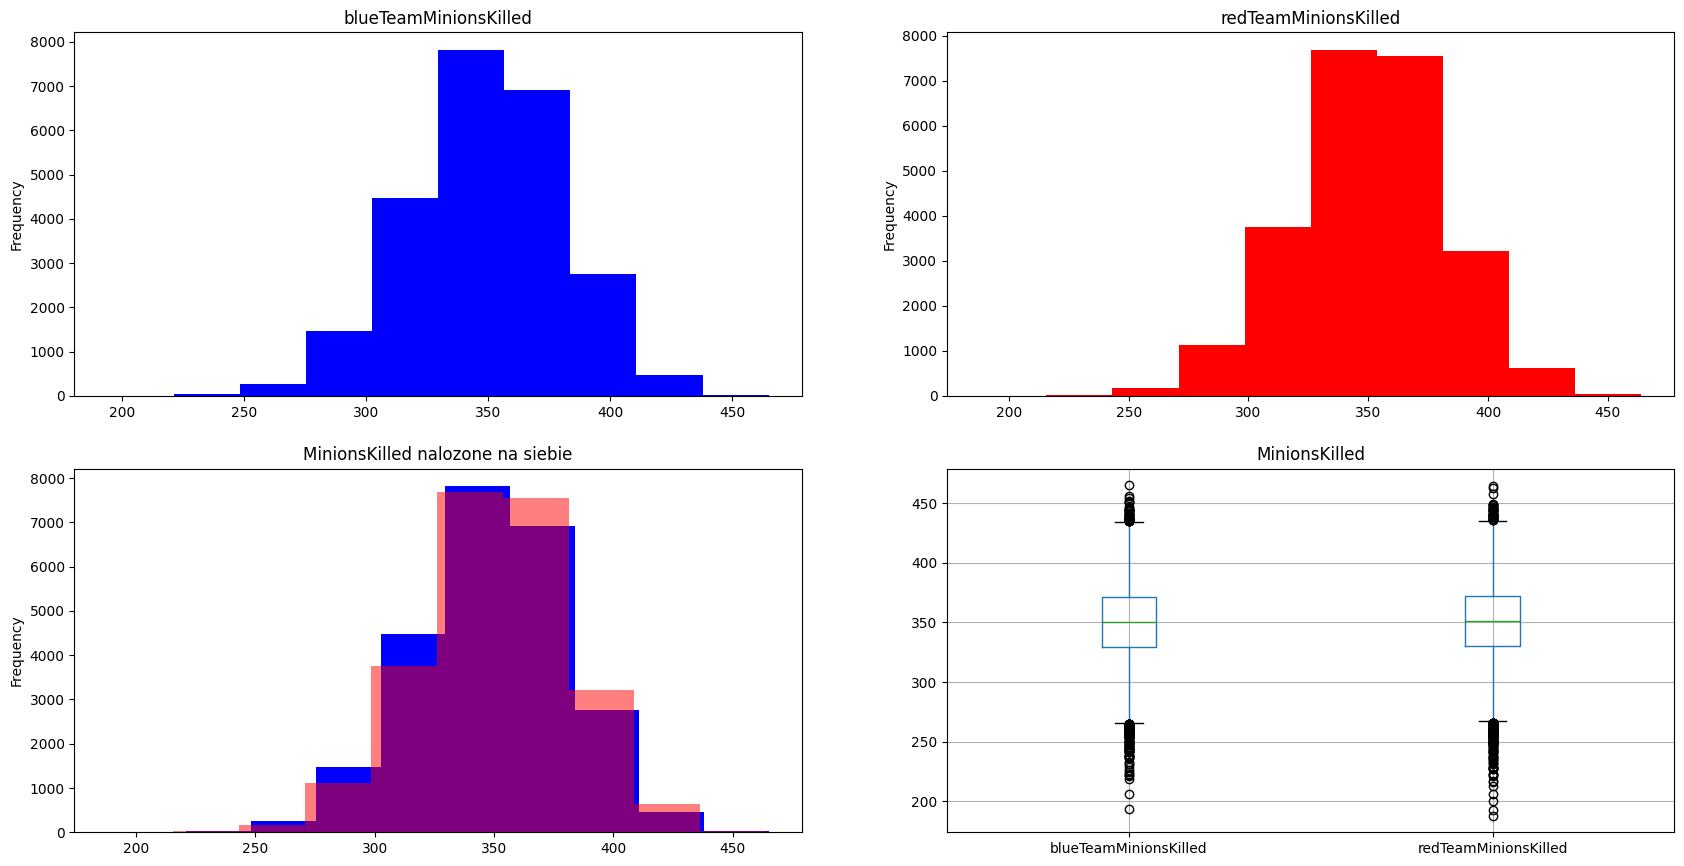

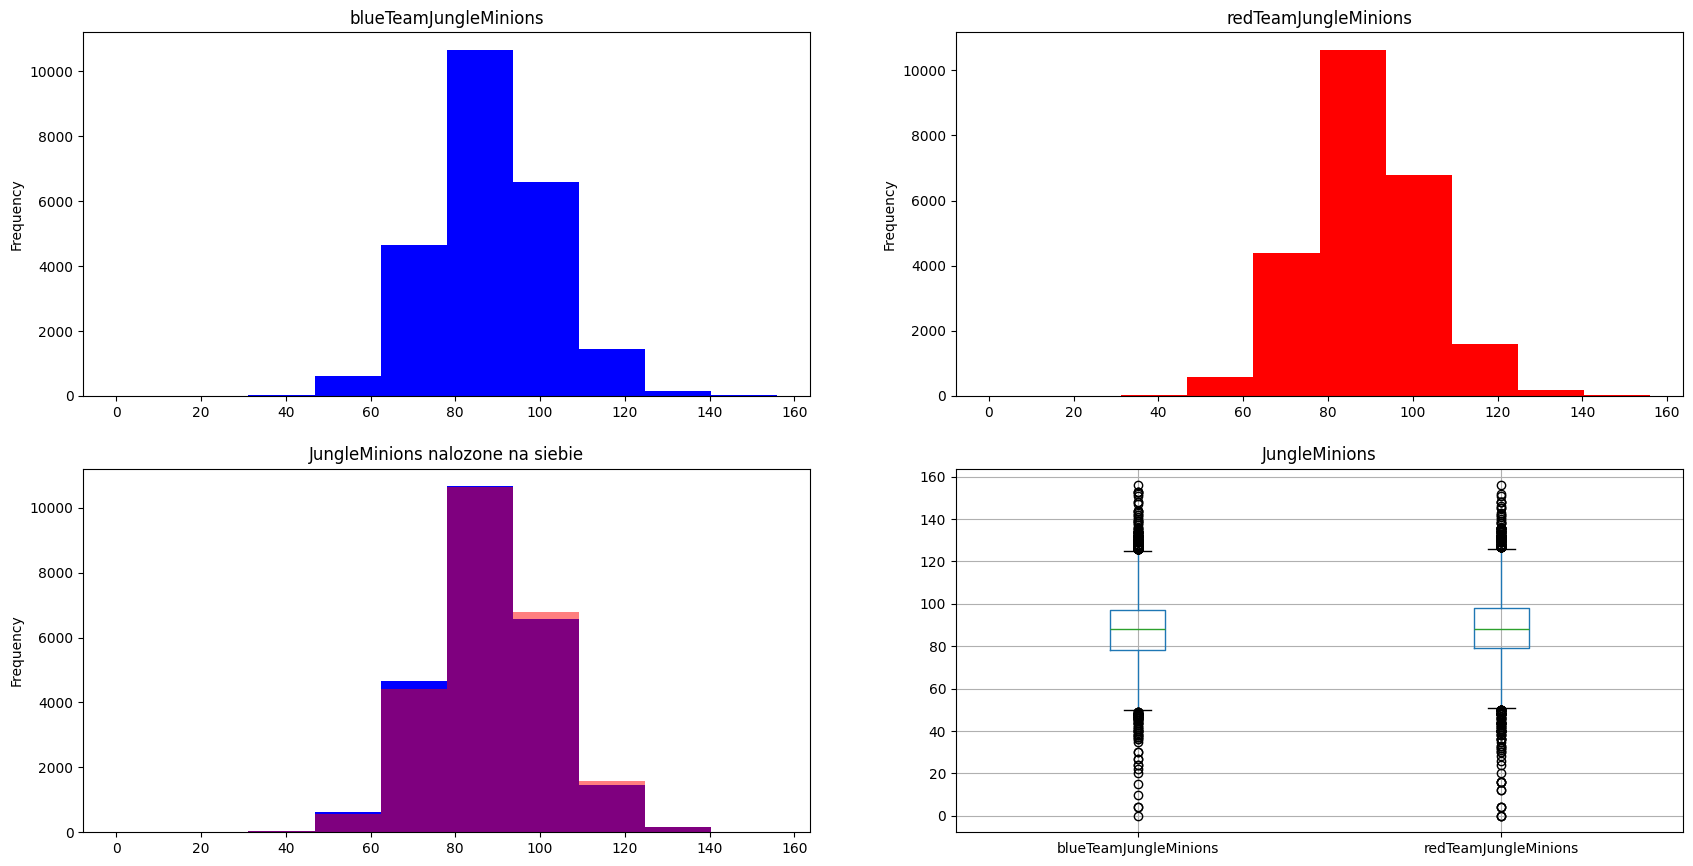

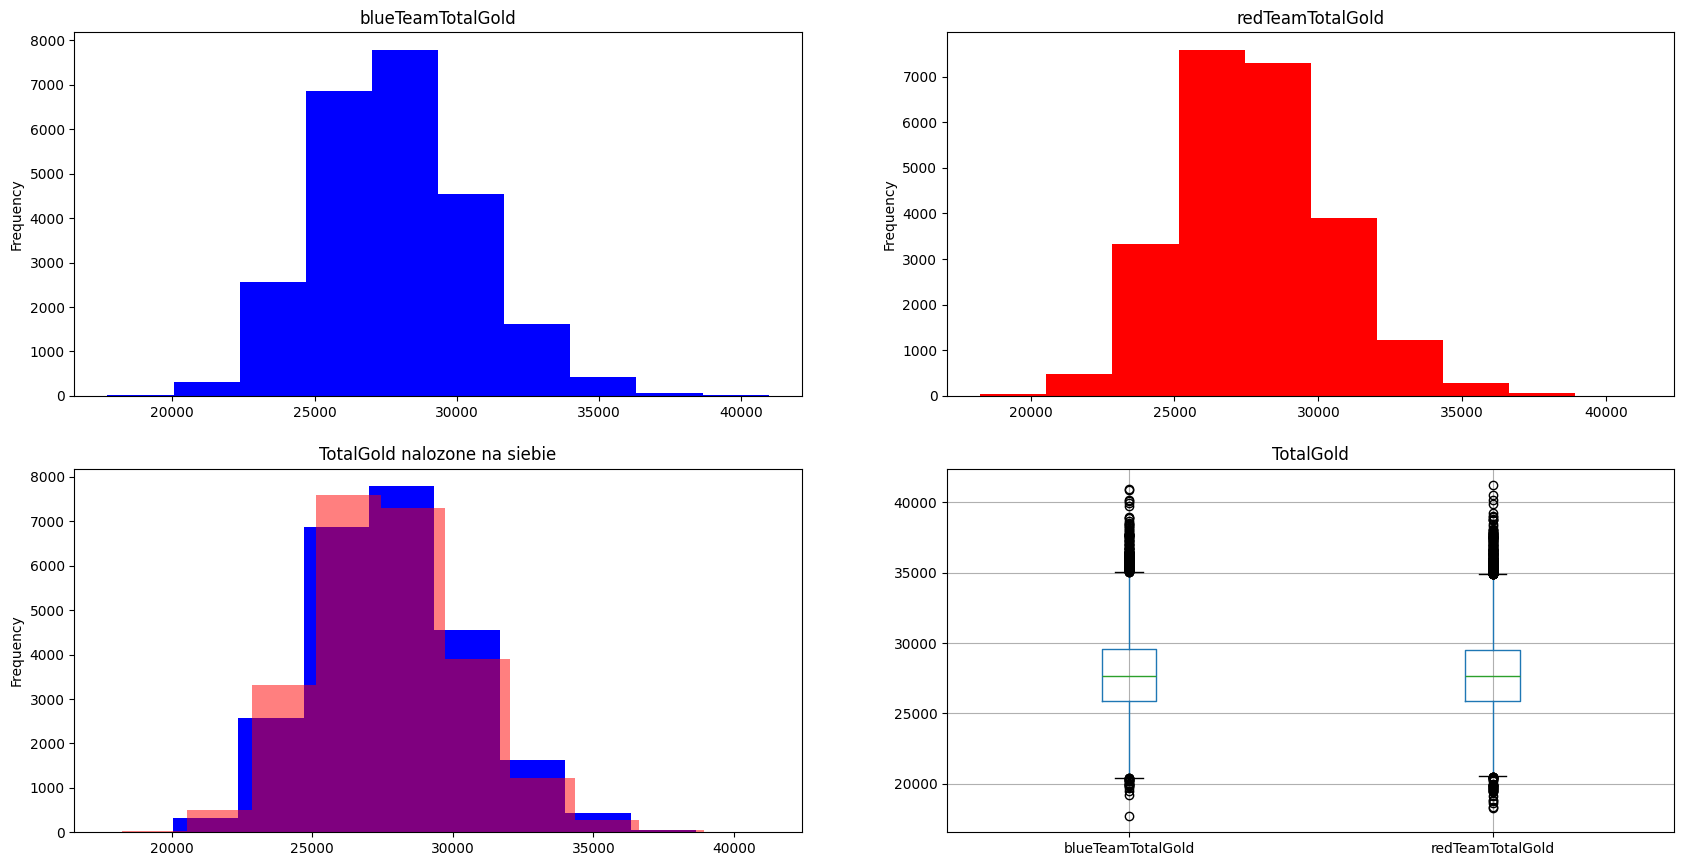

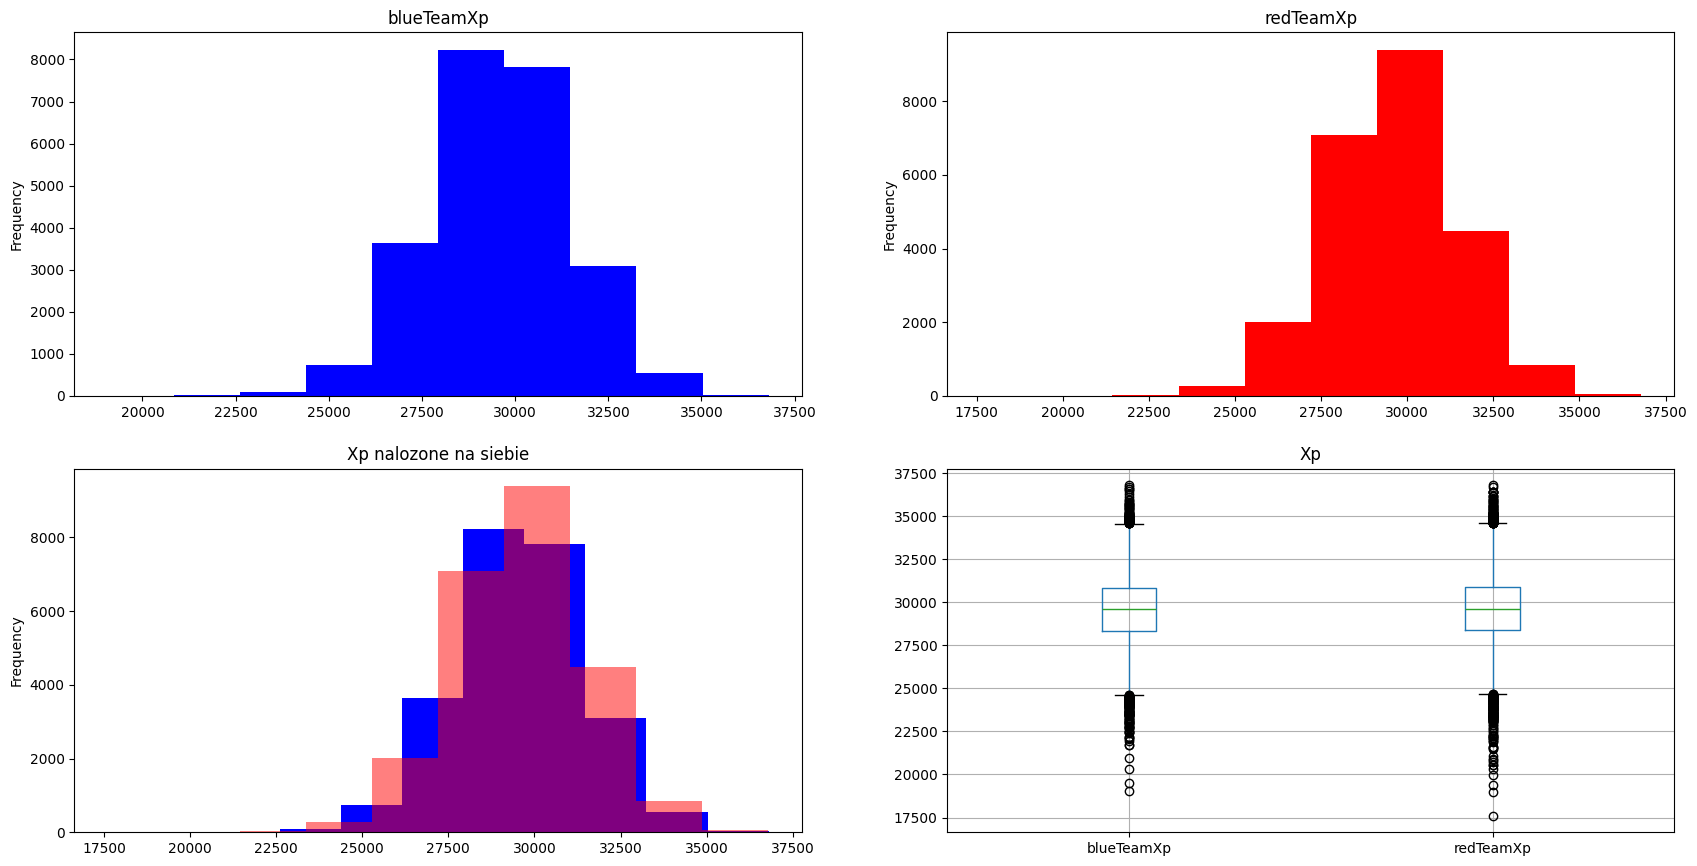

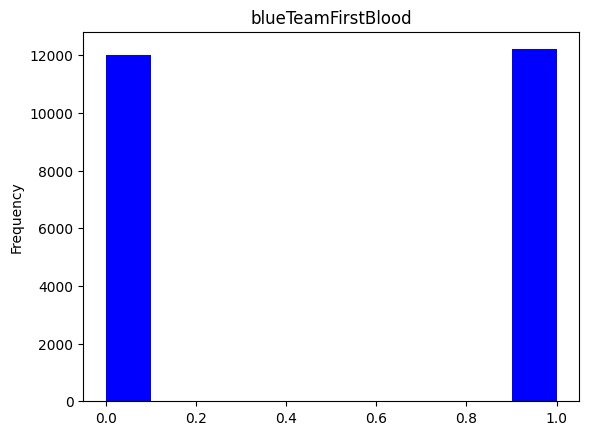

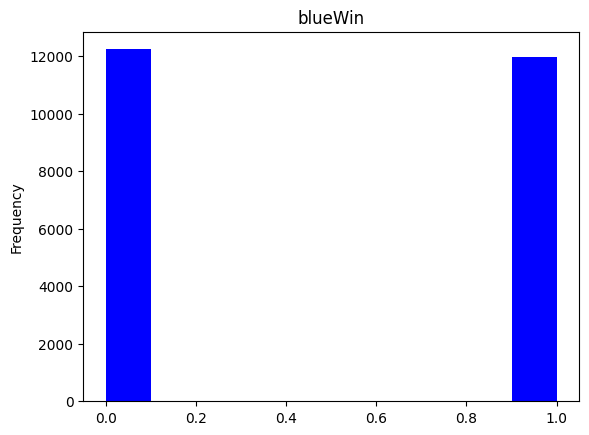

In [4]:
import matplotlib.pyplot as plt
def plot_data_info(data, feature_names, symmetric_features):
    for i in feature_names:
        b_col = "blueTeam" + i
        r_col = "redTeam" + i
            
        # Create a new figure with specified size
        plt.figure(figsize=(20, 10))
        
        # Adjust subplot layout
        plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
        #subplot 2 col 1 row
        plt.subplot(2,2,1)
        data[b_col].plot(kind='hist',  title=b_col, color='blue')
        plt.subplot(2,2,2)
        data[r_col].plot(kind='hist',  title=r_col, color='red')
        plt.subplot(2,2,3)
        data[b_col].plot(kind='hist',  title=b_col, color='blue')
        data[r_col].plot(kind='hist',  title=r_col, color='red', alpha=0.5)
        plt.title(i+ " nalozone na siebie")
        plt.subplot(2,2,4)
        data.boxplot(column=[b_col, r_col])
        plt.title(i)
        
        plt.plot()    

    for i in symmetric_features:
        plt.figure()
        data[i].plot(kind='hist',  title=i, color='blue')
        plt.plot()
plot_data_info(data, feature_names, symmetric_features)

In [5]:
data["blueWin"].value_counts()/len(data)



blueWin
0    0.50547
1    0.49453
Name: count, dtype: float64

In [6]:
pandas.DataFrame()

numpy.array()



NameError: name 'pandas' is not defined

W wykresie pudelkowym dane ktore sa poza wasami  ( oznaczone kropeczkami) uznajemy za odstajace. Stad wynika, ze kolumna TotalHeraldKills oraz InhibitorsDestroyed ma bardzo malo rekordow gdzie ta wartosc nie jest rowna zero, wiec wywalamy te kolumny. Nie daja zadnych informacji sensownych. W grze oznacza to tyle, ze przed 15 min. praktycznie nie dochodzi do pkonania heralda/zniszczenia inhibitorow. Ponad to widac ze z jakiegos powodu TurretPlatesDestroyed generalnie jest wieksze dla blueTeam i to dosc solidnie - dla blue srednia to okolo 9, red okolo 4  

Herald pojawia sie na mapie w 14minucie gry, a inhibitory sa tuz przed zakonczeniem meczu, wiec musialby byc to ekstremalnie zdominowane gry, zeby do tego doszlo.

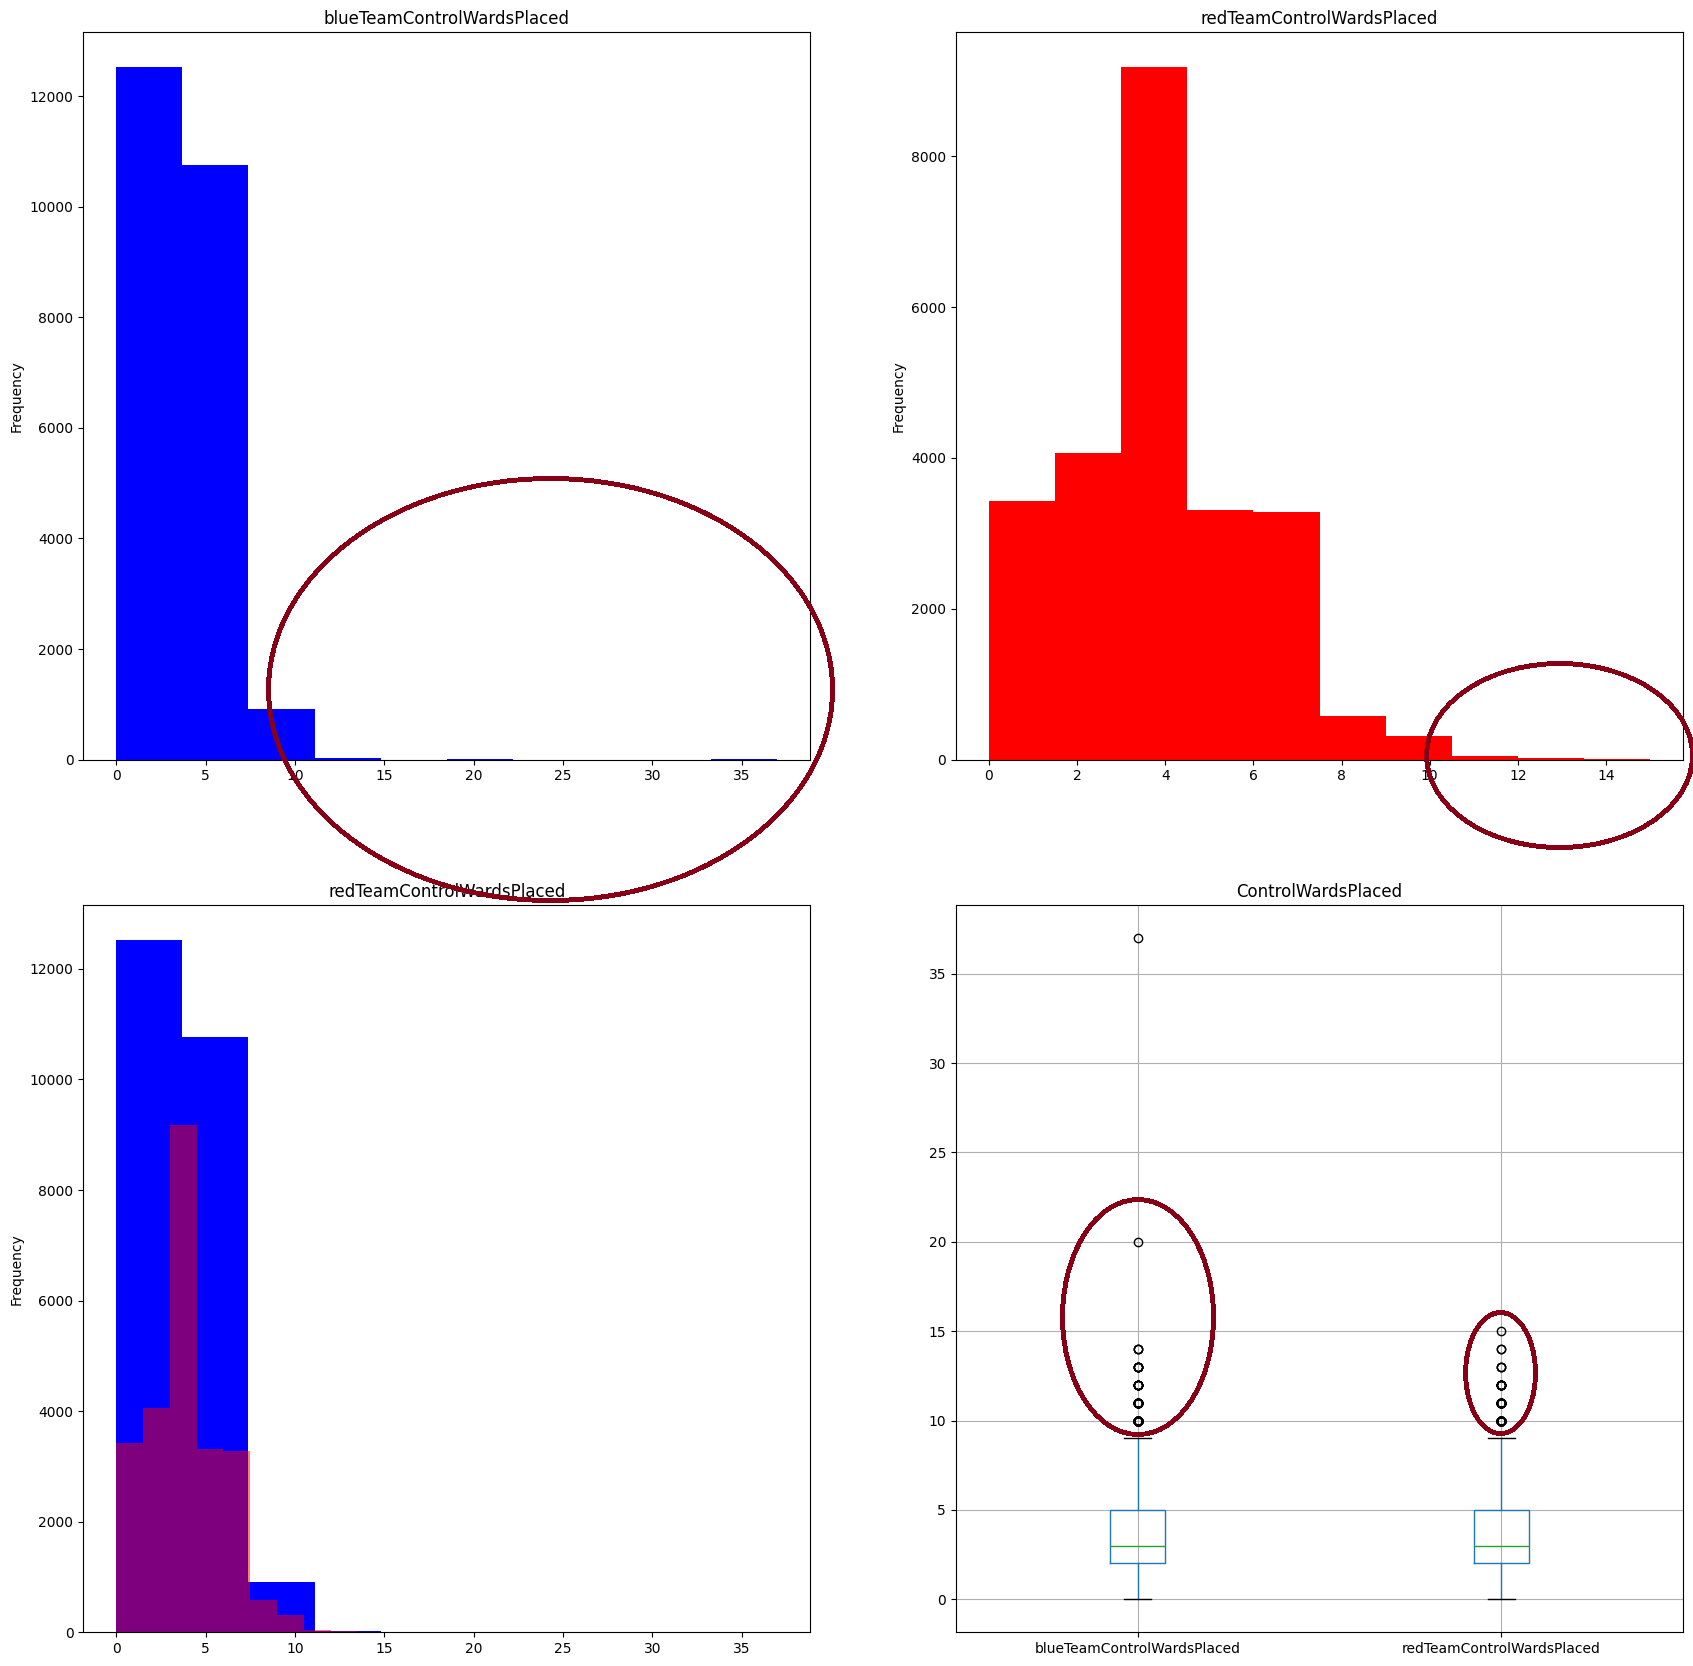

Zaznaczone czerwonym kolem to wartosci odstajace. Jak widzimy jest ich malo, a zakrzywiaja nam co jest wartoscia maksymalna/minimalna w danych 

<h4>Herald/Inhibitors</h4>

In [ ]:
print(data["blueTeamHeraldKills"].value_counts() + data["redTeamHeraldKills"].value_counts())
print(data["blueTeamInhibitorsDestroyed"].value_counts() + data["redTeamInhibitorsDestroyed"].value_counts())

0    42959.0
1     5490.0
2        NaN
Name: count, dtype: float64
blueTeamInhibitorsDestroyed
0    48380
1       54
2       16
Name: count, dtype: int64


In [ ]:
#drop herald kills where blue +red = 2 or blue = 2 or red = 2
data = data[~((data["blueTeamHeraldKills"] + data["redTeamHeraldKills"] == 2) | (data["blueTeamHeraldKills"] == 2) | (data["redTeamHeraldKills"] == 2))]
#drop inhibitors column
data.drop(["blueTeamInhibitorsDestroyed", "redTeamInhibitorsDestroyed"], axis=1, inplace=True)
feature_names.remove("InhibitorsDestroyed")

E:\Users\qesterius\AppData\Local\Temp\ipykernel_952\583732243.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(["blueTeamInhibitorsDestroyed", "redTeamInhibitorsDestroyed"], axis=1, inplace=True)


<h4>Reszta kolumn</h4>

In [ ]:
import numpy as np
#obliczanie gornego/dolnego wasa jak w boxplot. Od nich zaczynaja sie wartosci odstajace.
def calculate_whiskers(data):
    # Calculate quartiles (Q1, Q3) and IQR
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    
    # Calculate whisker range
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    
    return lower_whisker, upper_whisker


In [ ]:
columns_left_to_clean = feature_names.copy()
columns_left_to_clean.remove("HeraldKills")

for i in columns_left_to_clean:
    b_col = "blueTeam" + i
    r_col = "redTeam" + i
    lower_whisker, upper_whisker = calculate_whiskers(data[b_col])
    data = data[(data[b_col] >= lower_whisker) & (data[b_col] <= upper_whisker)]
    lower_whisker, upper_whisker = calculate_whiskers(data[r_col])
    data = data[(data[r_col] >= lower_whisker) & (data[r_col] <= upper_whisker)]

<h3>Dane po oczyszczeniu</h3>

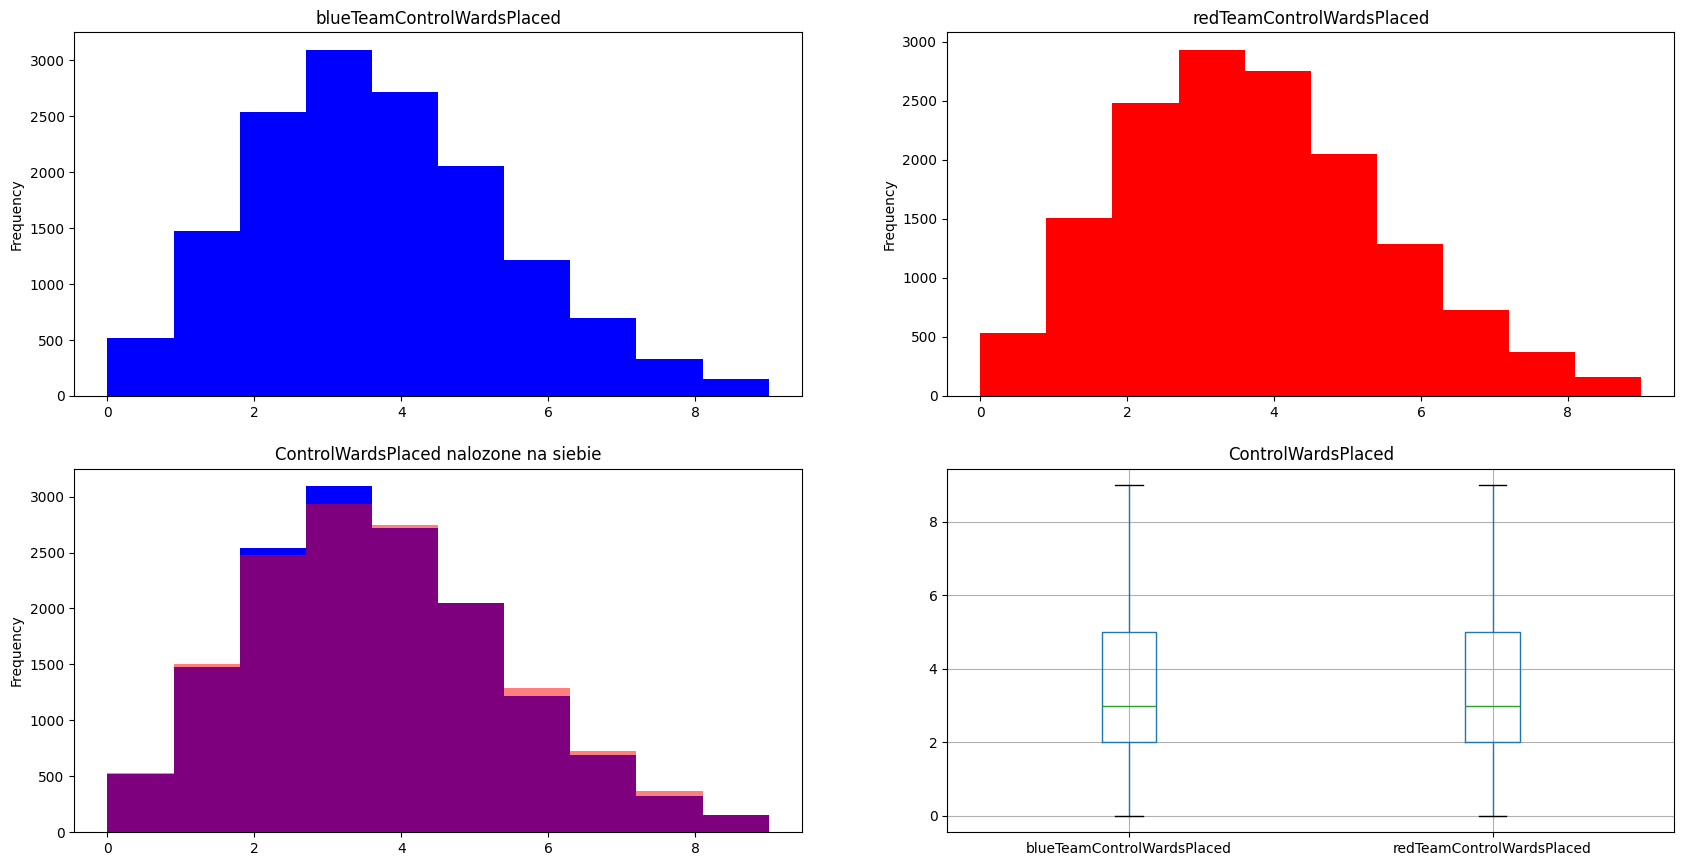

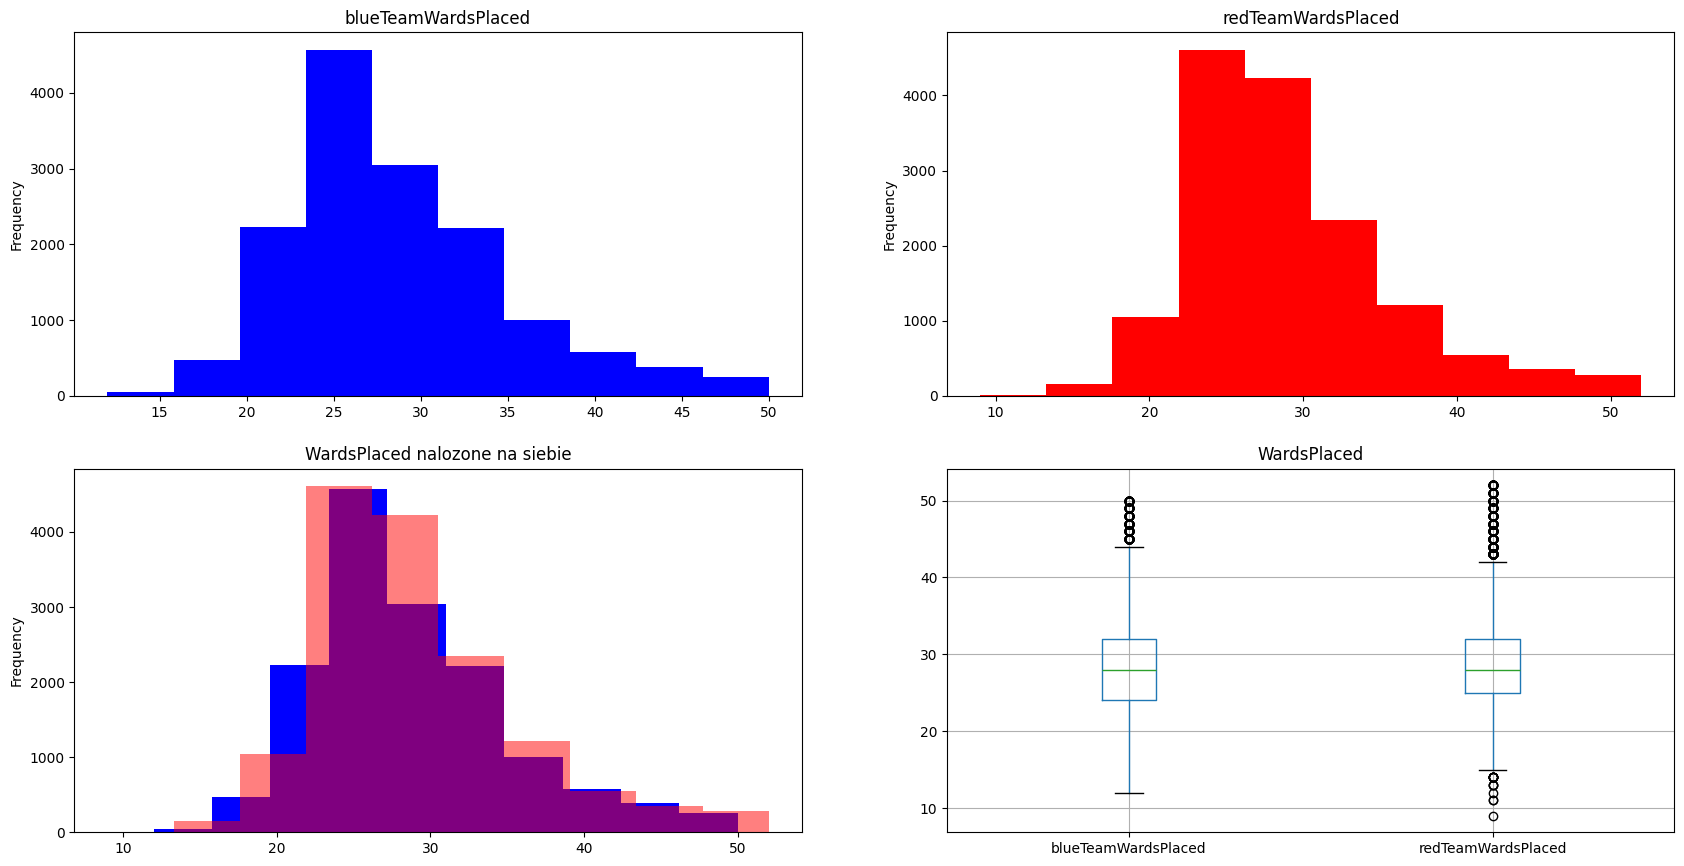

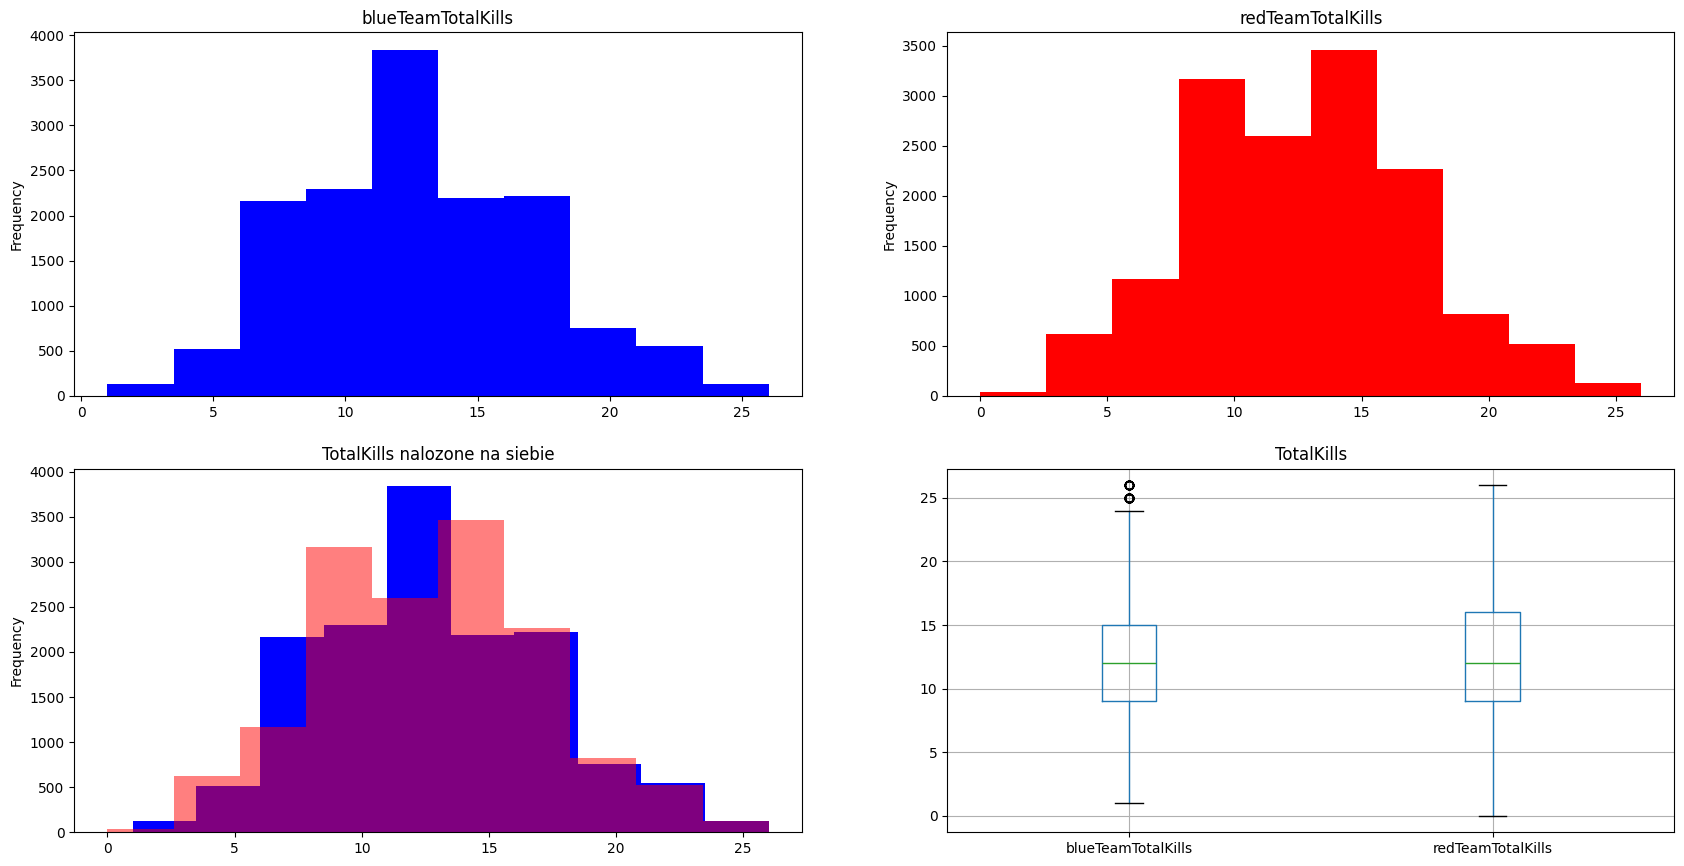

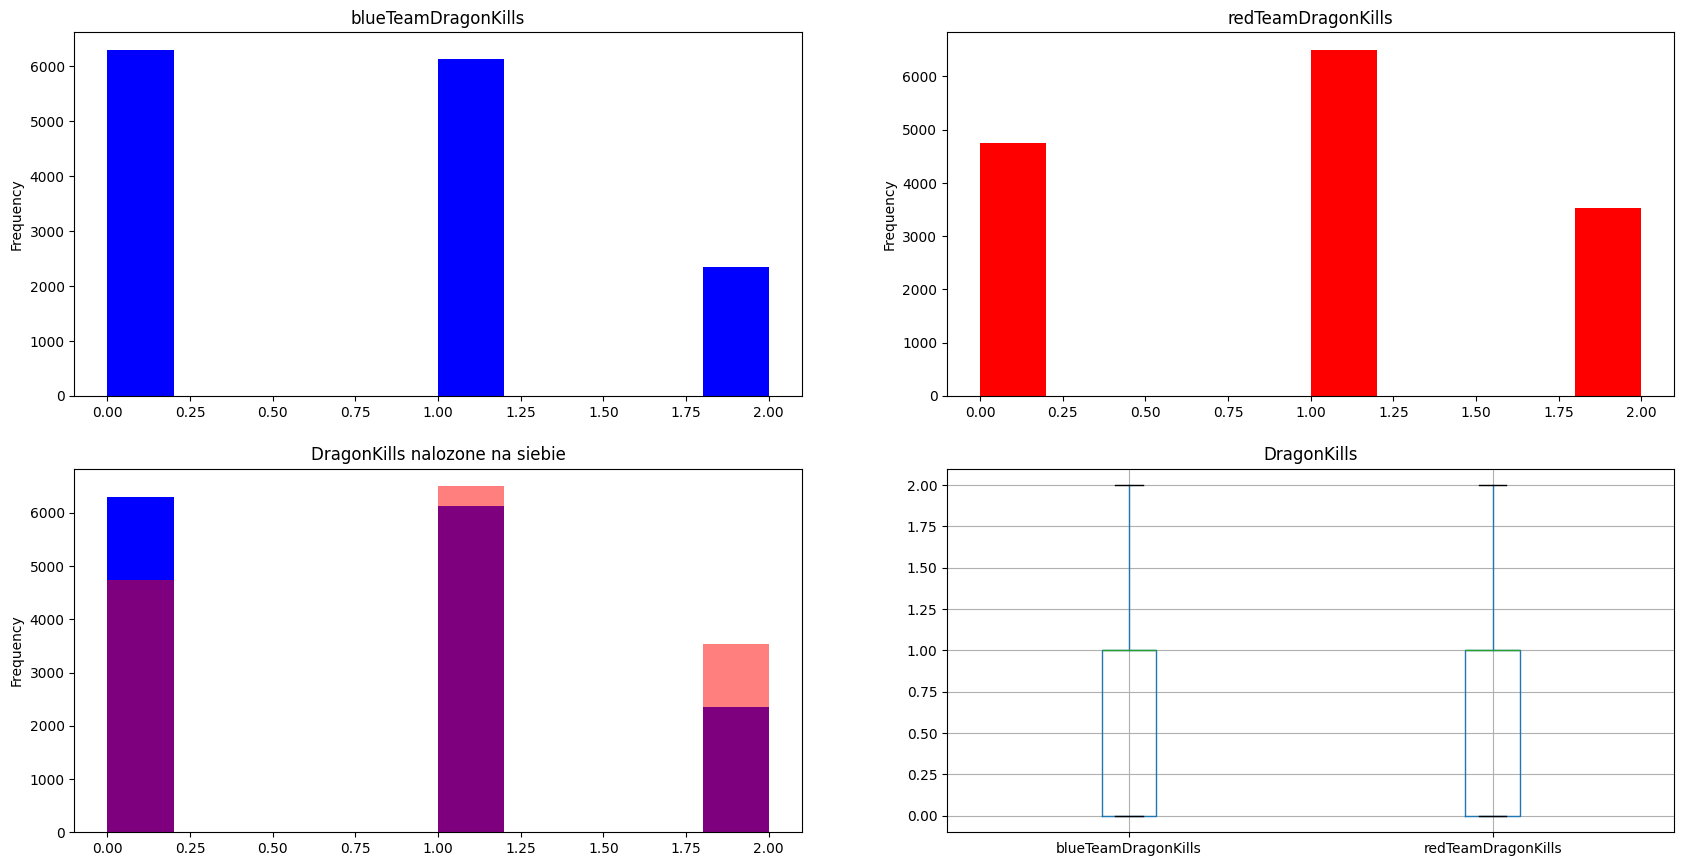

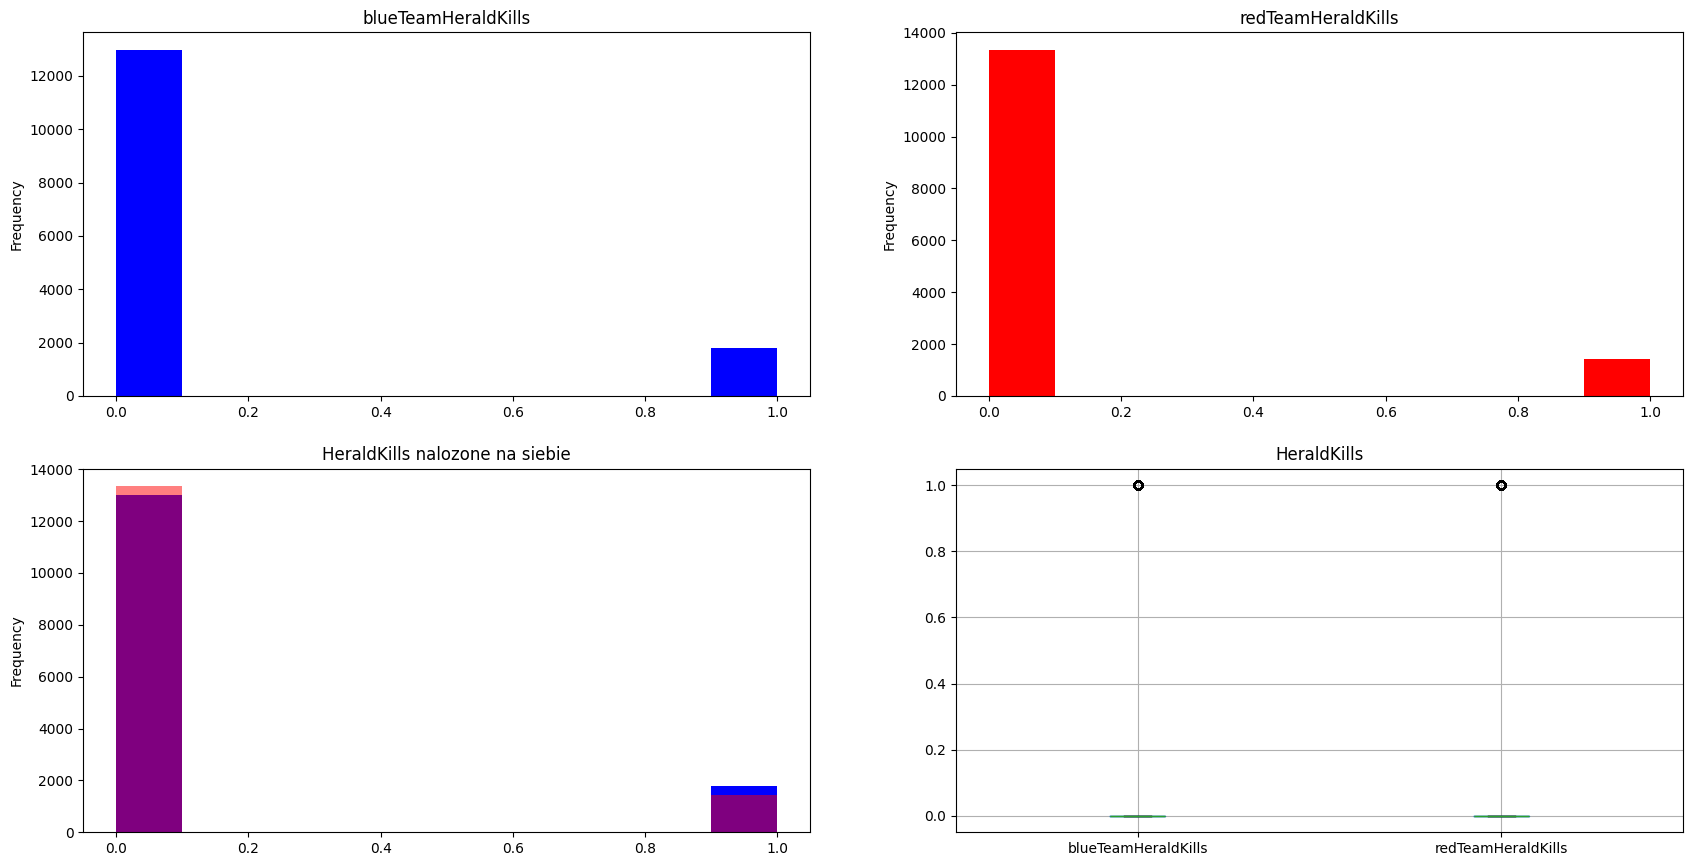

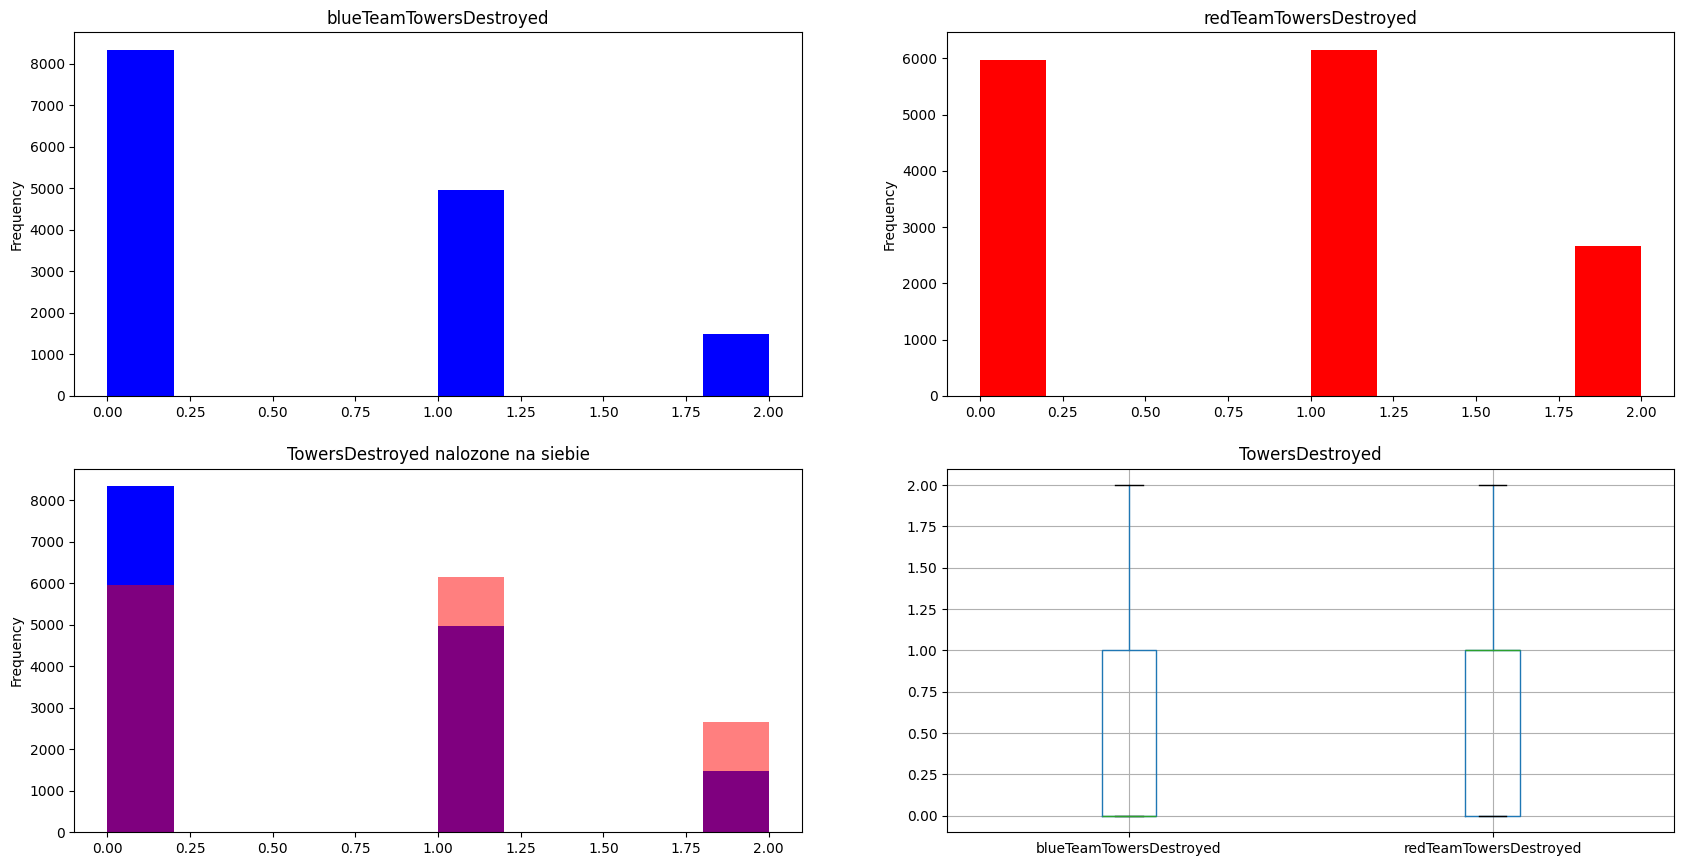

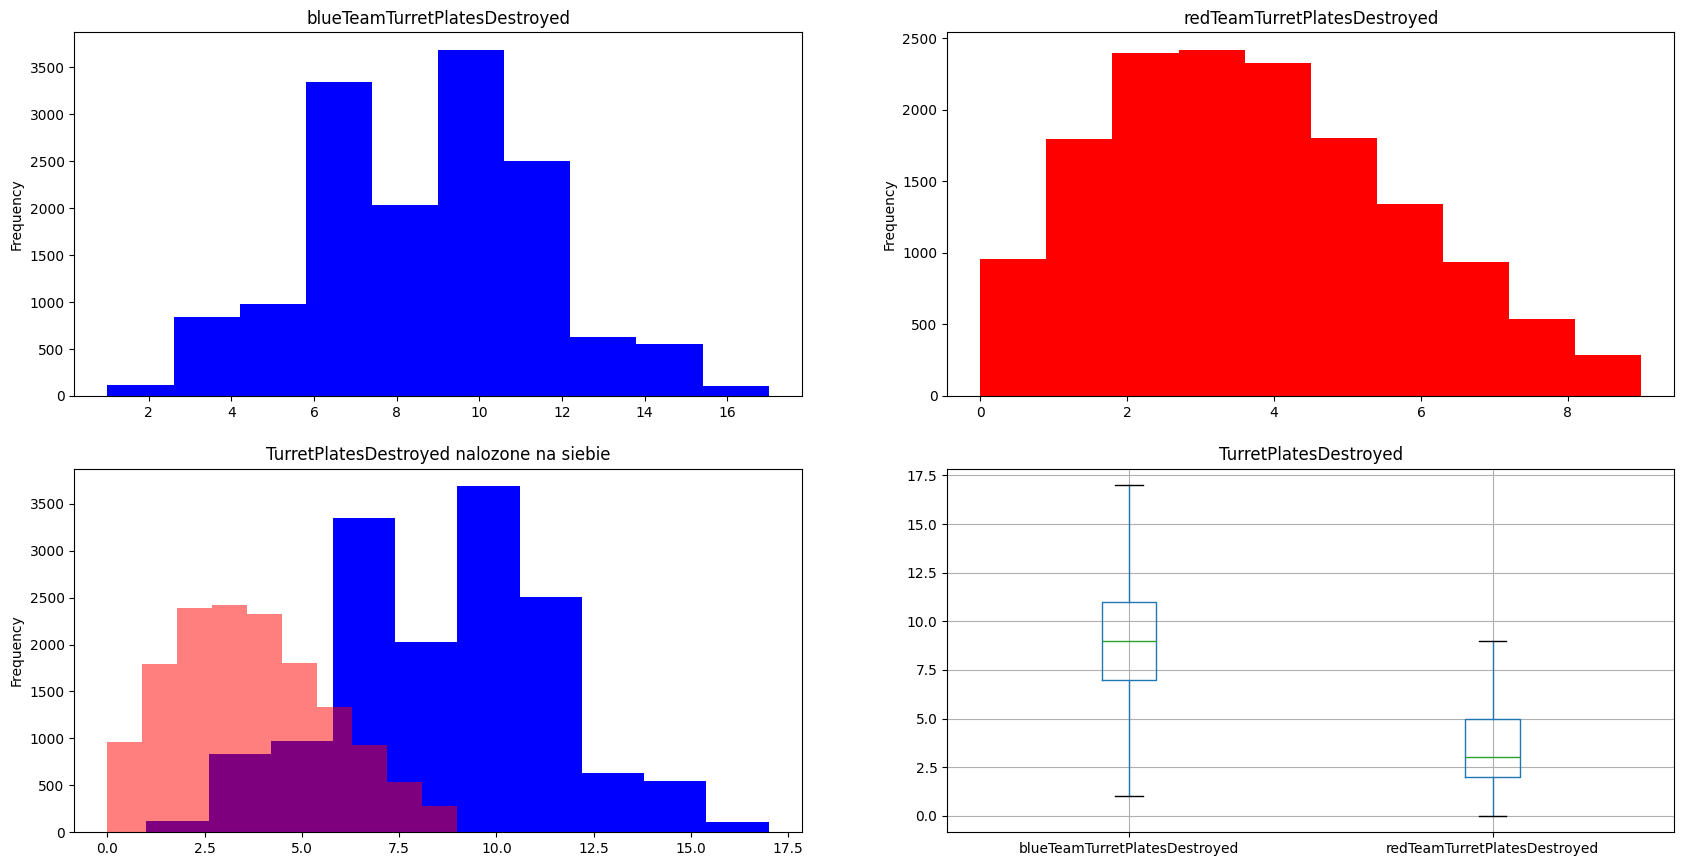

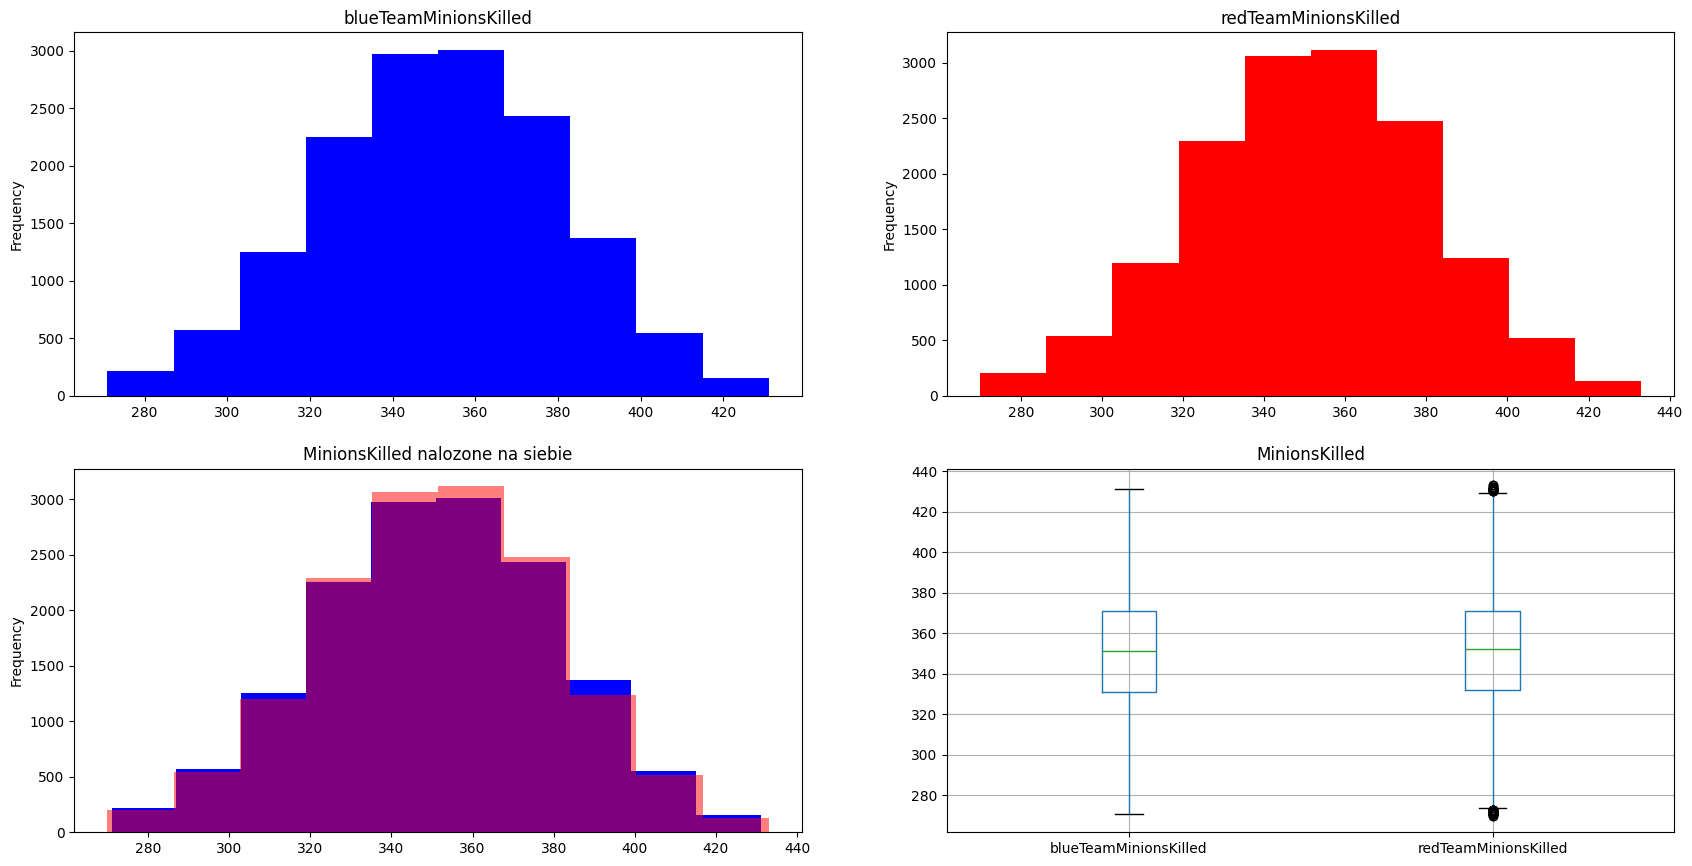

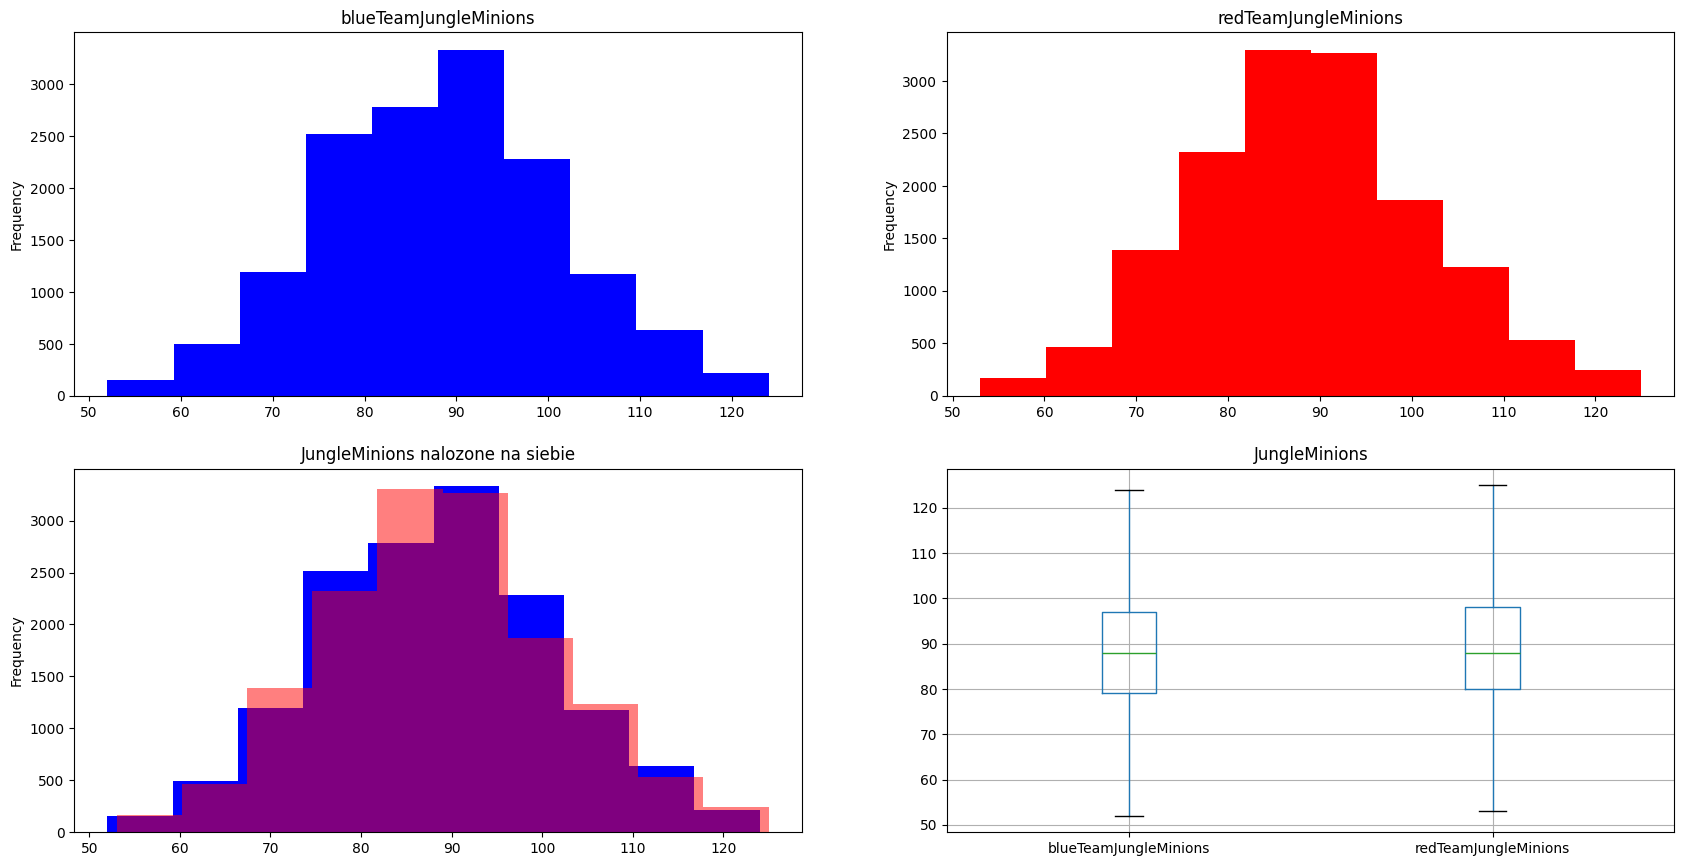

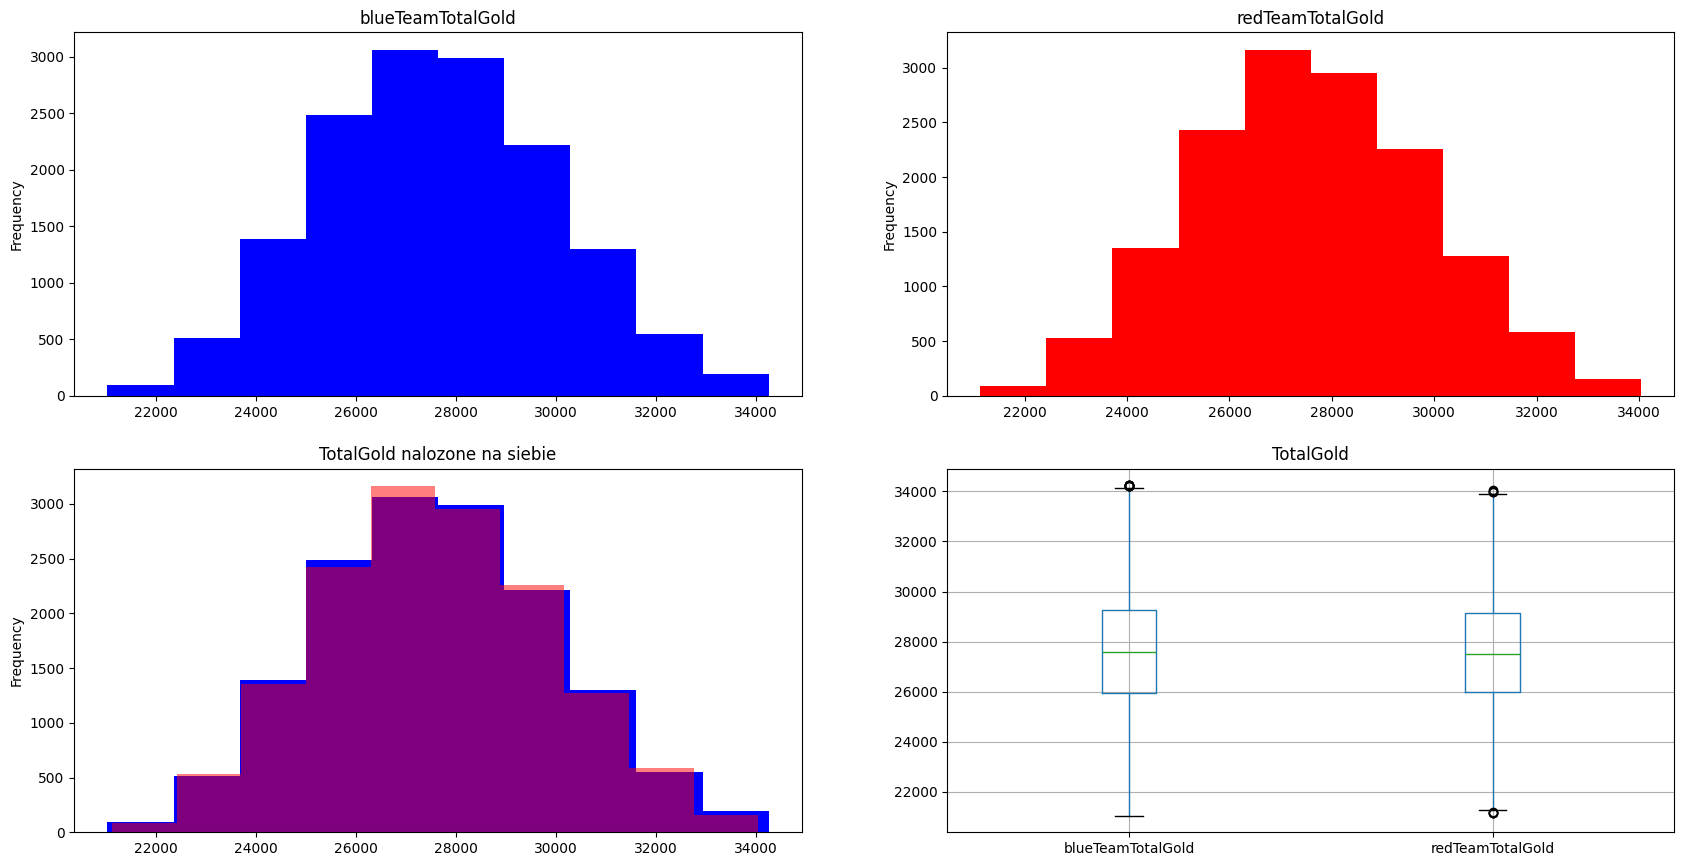

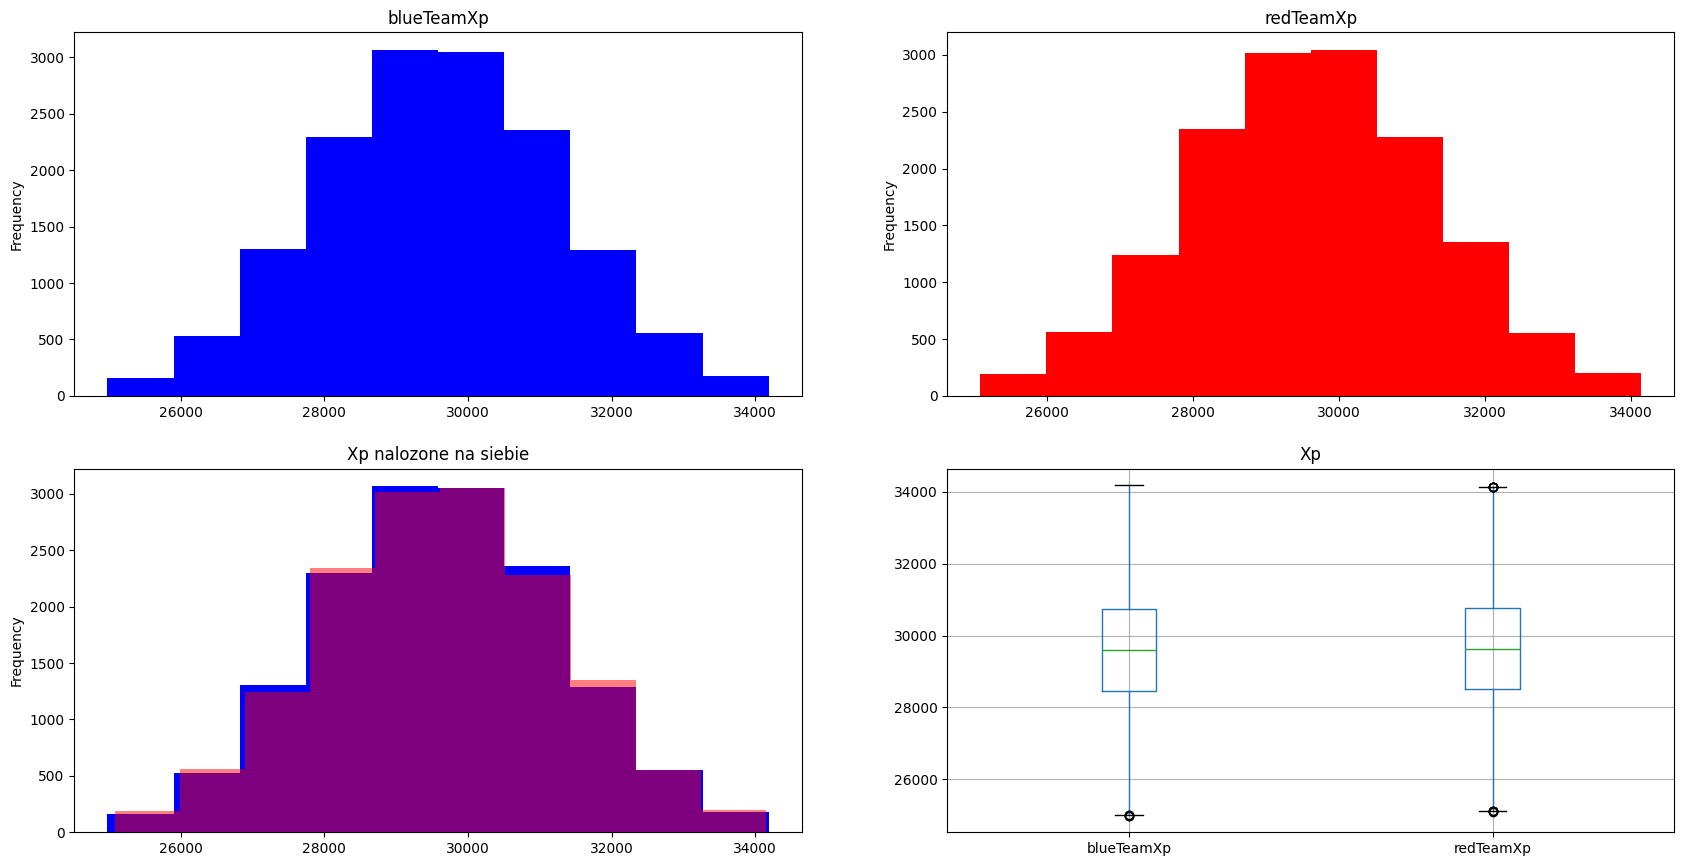

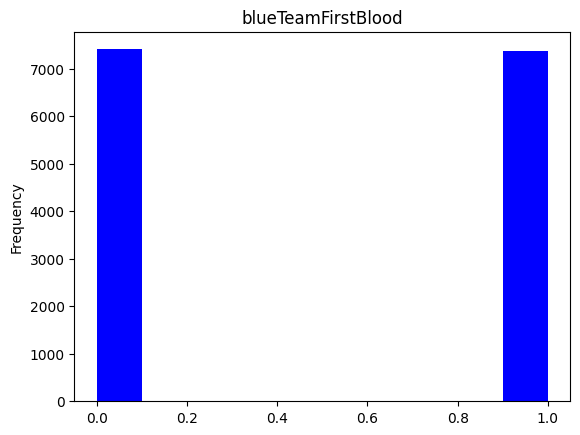

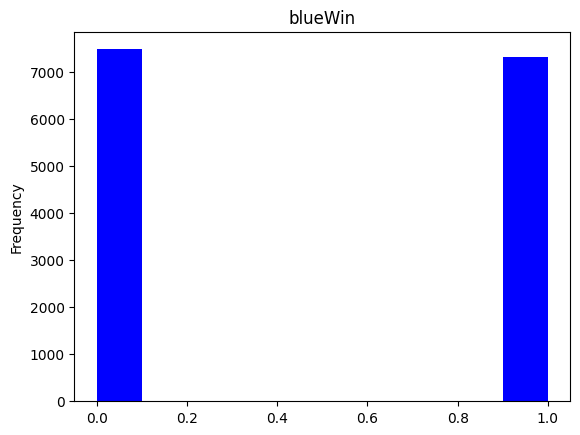

In [ ]:
plot_data_info(data, feature_names, symmetric_features)

<h2>Klasyfikacja</h2>

Stworzymy dodatkowa reprezentacje danych i je znormalizujemy dzielac przez wartos maksymalna.

Dodatkowa reprezentacja bedzie taka, ze zamiast wynikow dla kazdej z druzyn bedziemy mieli roznice ich wynikow, zeby wiedziec o ile ma przewage jedna ze stron.

blue - red

- wartosci < 0 - przewaga red

- wartosci > 0 - przewaga blue

otrzymamy w ten sposob o polowe mniej kolumn


Ponad to, do wprowadzenia danych w siec neuronowa musimy je znormalizowac, zeby kazde mialy wartosci z przedzialu <-1,1> co otrzymamy przez podzielenie przez wartosc maksymalna



In [ ]:
data.columns

Index(['blueTeamControlWardsPlaced', 'blueTeamWardsPlaced',
       'blueTeamTotalKills', 'blueTeamDragonKills', 'blueTeamHeraldKills',
       'blueTeamTowersDestroyed', 'blueTeamTurretPlatesDestroyed',
       'blueTeamFirstBlood', 'blueTeamMinionsKilled', 'blueTeamJungleMinions',
       'blueTeamTotalGold', 'blueTeamXp', 'blueTeamTotalDamageToChamps',
       'redTeamControlWardsPlaced', 'redTeamWardsPlaced', 'redTeamTotalKills',
       'redTeamDragonKills', 'redTeamHeraldKills', 'redTeamTowersDestroyed',
       'redTeamTurretPlatesDestroyed', 'redTeamMinionsKilled',
       'redTeamJungleMinions', 'redTeamTotalGold', 'redTeamXp',
       'redTeamTotalDamageToChamps', 'blueWin'],
      dtype='object')

In [ ]:
features = data.drop("blueWin", inplace=False, axis=1)
target = data["blueWin"]
symmetric_features.remove("blueWin") #remove so our target is not in features below

<h4>Reprezentacja "roznicowa"</h4>

In [ ]:
data_delta = pd.DataFrame()

for i in feature_names:
    red_column_name = "redTeam"+i
    blue_column_name = "blueTeam"+i
    delta = data[blue_column_name] - data[red_column_name]
    sum = data[blue_column_name] + data[red_column_name]
    data_delta[i] = delta/sum
    data_delta.fillna({i: 0},inplace=True)
    
for i in symmetric_features:
    data_delta[i] = data[i]
    
data_delta.head()

,ControlWardsPlaced,WardsPlaced,TotalKills,DragonKills,HeraldKills,TowersDestroyed,TurretPlatesDestroyed,MinionsKilled,JungleMinions,TotalGold,Xp,blueTeamFirstBlood
0,-0.5,-0.192982,-0.600000,1.0,0.0,-1.0,0.750000,-0.015228,0.060000,-0.106684,-0.045104,0
1,-0.5,0.277778,-0.172414,1.0,0.0,0.0,0.428571,-0.034674,0.126437,-0.019675,0.003451,0
3,1.0,0.098039,-0.111111,-1.0,1.0,1.0,0.285714,-0.031378,-0.017544,0.041456,-0.009799,1
4,-0.4,0.071429,0.222222,0.0,1.0,0.0,0.166667,-0.015957,0.020408,0.031956,0.026280,0
7,0.0,0.132075,0.375000,1.0,0.0,0.0,0.600000,0.043941,0.019608,0.071796,0.030889,1


<h4>Reprezentacja zwykla ale znormalizowana</h4>

In [ ]:
maximum_per_column = {}
data_norm = pd.DataFrame()


for i in feature_names:
    red_column_name = "redTeam"+i
    blue_column_name = "blueTeam"+i
    maximum_per_column[i] = max(max(data[red_column_name]),max(data[blue_column_name]))
    data_norm[red_column_name] = data[red_column_name]/maximum_per_column[i]  
    data_norm[blue_column_name] = data[blue_column_name]/maximum_per_column[i]  
    
for i in symmetric_features:
    data_norm[i] = data[i]/data[i].max()
    
data_norm.head()

,redTeamControlWardsPlaced,blueTeamControlWardsPlaced,redTeamWardsPlaced,blueTeamWardsPlaced,redTeamTotalKills,blueTeamTotalKills,redTeamDragonKills,blueTeamDragonKills,redTeamHeraldKills,blueTeamHeraldKills,...,blueTeamTurretPlatesDestroyed,redTeamMinionsKilled,blueTeamMinionsKilled,redTeamJungleMinions,blueTeamJungleMinions,redTeamTotalGold,blueTeamTotalGold,redTeamXp,blueTeamXp,blueTeamFirstBlood
0,0.666667,0.222222,0.653846,0.442308,0.615385,0.153846,0.0,1.0,0.0,0.0,...,0.411765,0.923788,0.896074,0.752,0.848,0.865314,0.698482,0.953959,0.871618,0.0
1,0.666667,0.222222,0.500000,0.884615,0.653846,0.461538,0.0,0.5,0.0,0.0,...,0.588235,0.861432,0.803695,0.608,0.784,0.845839,0.813197,0.886887,0.893030,0.0
3,0.000000,0.333333,0.442308,0.538462,0.384615,0.307692,0.5,0.0,0.0,1.0,...,0.529412,0.872979,0.819861,0.696,0.672,0.734511,0.798044,0.908796,0.891157,1.0
4,0.777778,0.333333,0.500000,0.576923,0.269231,0.423077,0.5,0.5,0.0,1.0,...,0.411765,0.882217,0.854503,0.768,0.800,0.760642,0.810861,0.862170,0.908708,0.0
7,0.000000,0.000000,0.442308,0.576923,0.192308,0.423077,0.0,0.5,0.0,0.0,...,0.470588,0.829099,0.905312,0.800,0.832,0.703796,0.812672,0.858075,0.912774,1.0


<Axes: >

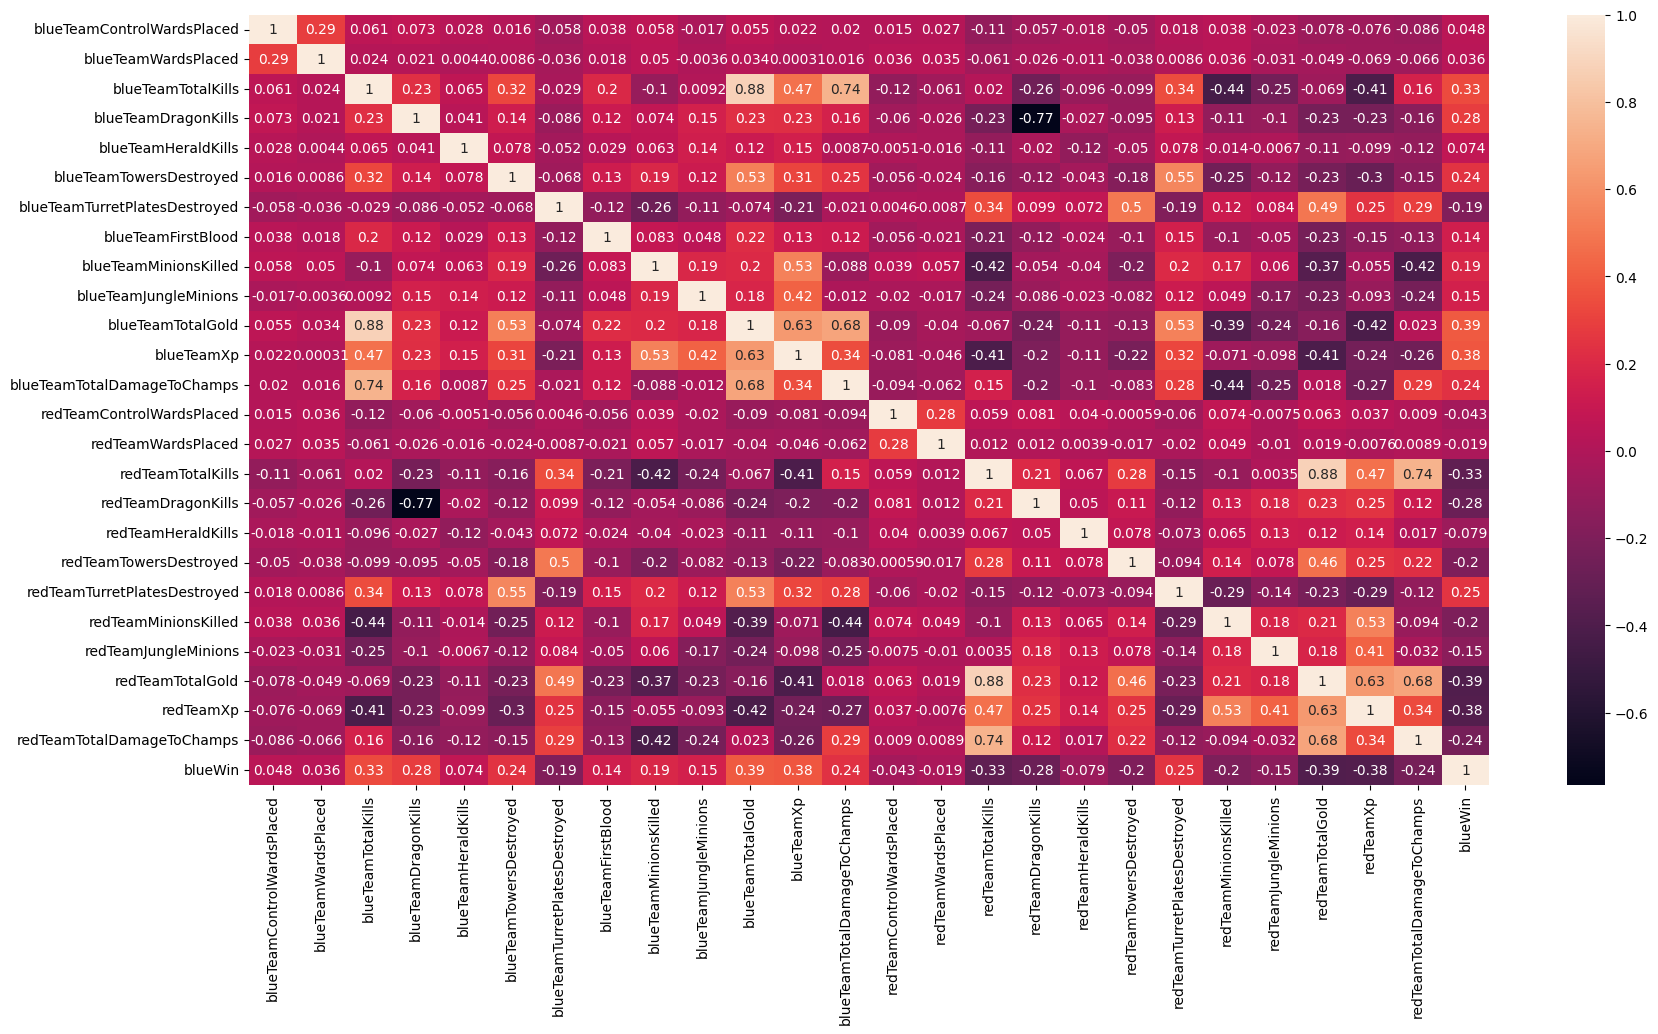

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

<Axes: >

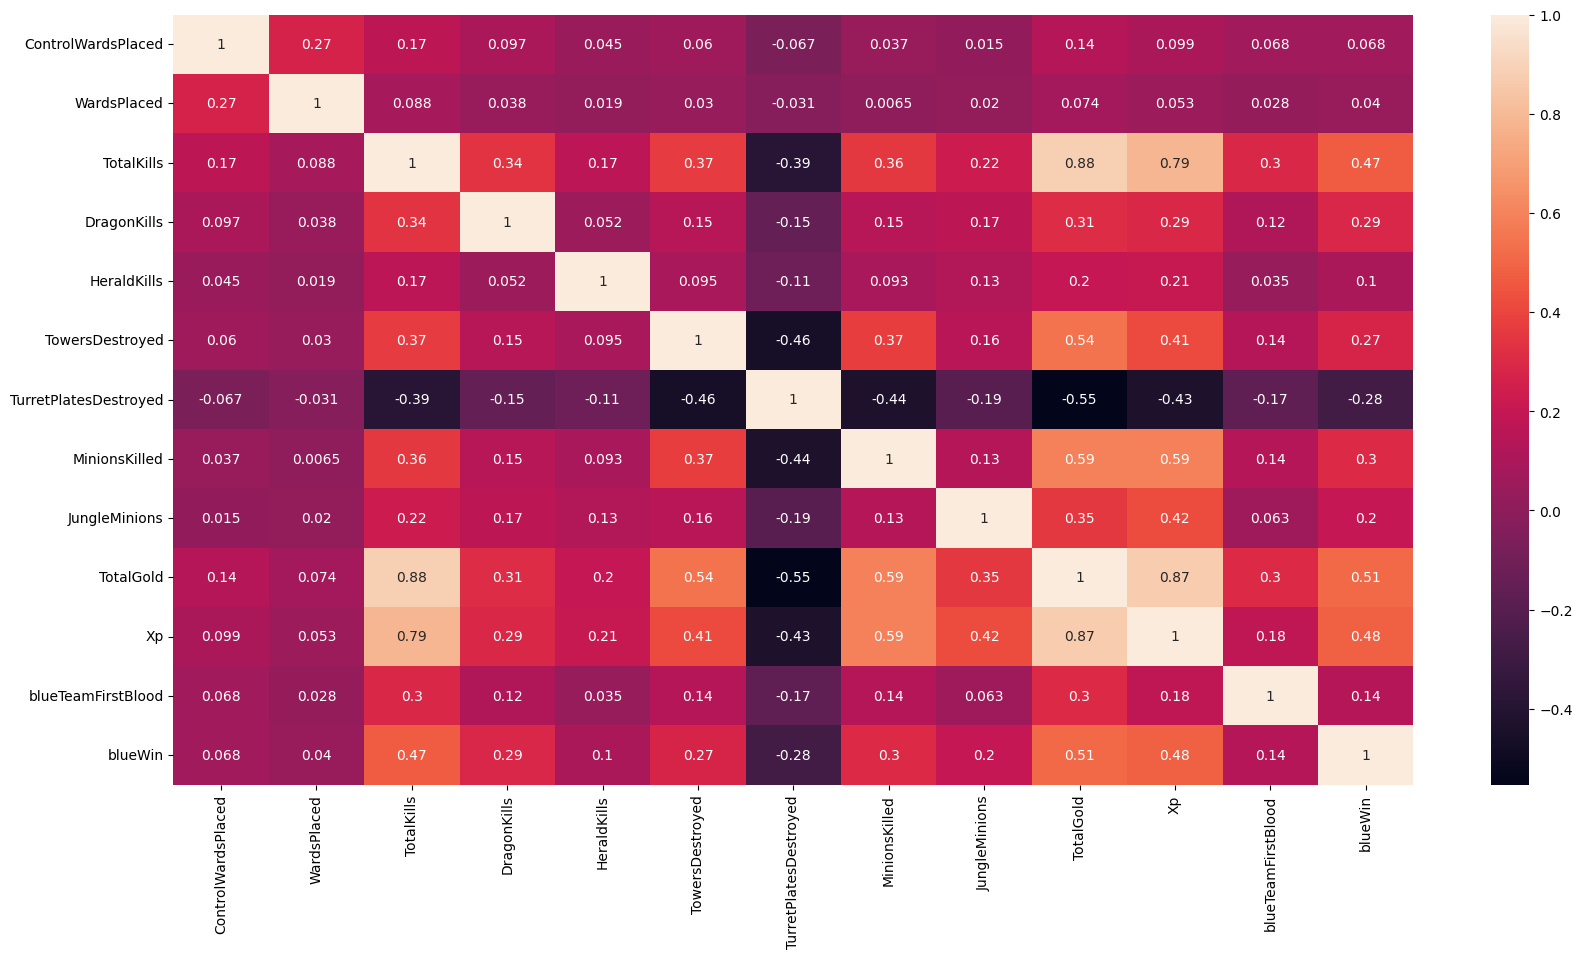

In [ ]:
corr_delta_data = data_delta.copy()
corr_delta_data["blueWin"] = target

plt.figure(figsize=(20,10))
sns.heatmap(corr_delta_data.corr(), annot=True)

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.3
def train_test_decision_tree(input,target):
    x_train, x_test, y_train, y_test = train_test_split(input, target, random_state=0, shuffle=True, test_size=TEST_SIZE)
    min_samples_leaf_to_test = [10, 100,200,300, 1000]
    max_depth_to_test = [10, 20, 50, 100, 500, 1000]
    best_score = 0
    best_depth = 0
    best_leaf  = 0
    
    for leaf in min_samples_leaf_to_test:
        for depth in max_depth_to_test:
            tree_classifier = tree.DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf)
            tree_classifier.fit(x_train,y_train)
            score = tree_classifier.score(x_test, y_test)
            
            if(score > best_score):
                best_depth = depth
                best_leaf = leaf
                best_score = score

    return best_score, best_depth, best_leaf        

In [ ]:
print("Unnormalized data decision tree accuracy:", train_test_decision_tree(features, target))
print("Normalized data decision tree accuracy:", train_test_decision_tree(data_norm, target))
print("Unnormalized delta_data decision tree accuracy:", train_test_decision_tree(data_delta, target))



Unnormalized data decision tree accuracy: (0.7234617985125085, 10, 100)
Normalized data decision tree accuracy: (0.7234617985125085, 10, 100)
Unnormalized delta_data decision tree accuracy: (0.7329276538201488, 10, 200)


In [ ]:
import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self, input_size, *args, **kwargs):
        super(SimpleNN, self).__init__(*args, **kwargs)
        self.input_size = input_size
    
        self.layers = nn.Sequential(
            nn.Linear(self.input_size, 50),
            nn.ReLU(),
            nn.Linear(50, 100),
            nn.ReLU(),
            nn.Linear(100, 1),
            nn.Sigmoid()        
        )
        
    def forward(self, x):
        return self.layers(x)

In [ ]:
def cost_function(y_pred, y_target):
    y_pred.round()
    return  nn.functional.binary_cross_entropy(y_pred,y_target)

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.adam import Adam
import torch


TEST_SIZE = 0.3
EPOCHS = 1000
LR = 0.02
BATCH_SIZE = 300
def train_test_NN(input,target, model, epochs=EPOCHS, batch_size=BATCH_SIZE, lr=LR):
    optimizer = Adam(model.parameters(), lr=lr)
    x_train, x_test, y_train, y_test  = train_test_split(input, target, random_state=0, shuffle=True, test_size=TEST_SIZE)
    print(x_train.shape)
    print(y_train.shape)
    dataset = TensorDataset(x_train,y_train)
    
    batched_data = DataLoader(dataset , batch_size=batch_size, shuffle=True )
    loss_hist = []
    test_hist = []
    for epoch in range(epochs):
        epoch_loss = 0
        for x,y in batched_data:
            print(x)
            print(y)
            x = torch.tensor(x)
            y = torch.tensor(y)
            
            optimizer.zero_grad()
            pred = model(x)
            loss = cost_function(pred, y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        loss_hist.append(epoch_loss/len(batched_data))

        with torch.no_grad():
            pred = model(x_test)
            test_score = cost_function(pred,y_test).item()
            test_hist.append(test_score)
                
    plt.plot(loss_hist)
    plt.plot(test_hist)
    plt.title("Trening")
    plt.show()
    print(max(test_hist))

Trenowanie 3 prostych sieci dla kazdej z reprezentacji danych jakie byly mowione powyzej:
- 1 dane 

In [ ]:
model_1 = SimpleNN(input_size=len(features.columns))
model_2 = SimpleNN(input_size=len(data_norm.columns))
model_3 = SimpleNN(input_size=len(data_delta.columns))

train_test_NN(features,target,model_1)
train_test_NN(data_norm,target,model_2)
train_test_NN(data_delta,target,model_3)

(10351, 25)
(10351,)


TypeError: 'int' object is not callable